In [1]:
set.seed(20)

library(dplyr)
library(caret)
library(tidyr)
library(ggplot2)
library(proxy)
library(broom)
library(corrplot)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'proxy'

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix



In [2]:
supervised_algorithms <- c("CART",
                           "naiveBayes",
                           "neuralNetwork",
                           "randomForest",
                           "SVM_linear",
                           "SVM_polynomial",
                           "SVM_radial", 
                           "SVM_sigmoid")
unsupervised_algorithms <- c("DBSCAN",
                             "kmeans",
                             "LOF")

semi_supervised_algorithms <- c("oneClassSVM_linear",
                                "oneClassSVM_polynomial",
                                "oneClassSVM_radial",
                                "oneClassSVM_sigmoid")

datasets <- c(
  "dataset_aloi",
  #"dataset_glass",
  "dataset_iono",
  "dataset_kdd",
  #"dataset_lym",
  "dataset_pen",
  "dataset_shuttle",
  "dataset_waveform",
  "dataset_wbc",
  "dataset_wdbc",
  "dataset_wpbc",
  "dataset_ann",
  "dataset_arr",
  "dataset_cardio", 
  "dataset_heart",
  "dataset_hepatitis",
  "dataset_ads",
  "dataset_blocks",
  "dataset_parkinson",
  "dataset_pima",
  "dataset_spam",
  "dataset_stamps",
  "dataset_wilt")

# 1) Technique Performance Study

In [3]:
#f_measure <- function(precision, recall, beta = 1)
#{
#  (1 + beta^2) * ((precision * recall) / ((precision * beta^2) + recall))
#}

In [4]:
evaluation_algorithms <- read.csv("results_evaluation/algorithms_metrics_2017-08-16.csv") %>% rename(algorithm_f1 = f1,
                                                                                                    algorithm_f20 = f20,
                                                                                                    algorithm_f05 = f05,
                                                                                                    algorithm_precision = precision,
                                                                                                    algorithm_recall = recall)

In [5]:
#evaluation_algorithms <- evaluation_algorithms %>% mutate(algorithm_f20 = f_measure(algorithm_precision,
#                                                                                    algorithm_recall,
#                                                                                    beta = 2),
#                                                          algorithm_f05 = f_measure(algorithm_precision,
#                                                                                    algorithm_recall,
#                                                                                    beta = 0.5))

# 1.1) Best Algorithm in F1

In [6]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f1) %>% select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,randomForest,rf,0.5895966,0.6000766,0.5795629
dataset_iono,SVM_radial,SVM_radial,0.9331795,0.9294872,0.9371795
dataset_kdd,randomForest,rf,0.8521795,0.8544737,0.8500000
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [7]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,randomForest,rf,0.5895966,0.6000766,0.5795629
dataset_iono,SVM_radial,SVM_radial,0.9331795,0.9294872,0.9371795
dataset_kdd,randomForest,rf,0.8521795,0.8544737,0.8500000
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [8]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,LOF,lof_03,0.2068966,0.2068966,0.2068966
dataset_iono,kmeans,kmeans_25,0.8492063,0.8492063,0.8492063
dataset_kdd,kmeans,kmeans_08,0.5600000,0.5600000,0.5600000
dataset_pen,LOF,lof_03,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_05,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_08,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_14,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_19,0.0500000,0.0500000,0.0500000
dataset_shuttle,DBSCAN,dbscan_1.1,0.4905660,0.3250000,1.0000000
dataset_waveform,kmeans,kmeans_30,0.2100000,0.2100000,0.2100000


In [9]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.065973082,0.034984664,0.5776777
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.675022325,0.518401491,0.9769231
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.016418152,0.008277033,1.0000000
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.008027038,0.004029698,1.0000000
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.049087824,0.025233064,1.0000000
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.087428604,0.046215005,0.8100000
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.169320402,0.093453116,1.0000000
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.099780293,0.052559335,1.0000000
dataset_wpbc,oneClassSVM_polynomial,oneClassSVM_polynomial,0.358608347,0.235025995,0.7750000
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.202801067,0.115936939,0.8091894


# 1.2) Best Algorithm in F2

In [10]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f20
dataset_aloi,randomForest,rf,0.5835250
dataset_iono,SVM_radial,SVM_radial,0.9355401
dataset_kdd,randomForest,rf,0.8508586
dataset_pen,neuralNetwork,mlp,1.0000000
dataset_shuttle,CART,cart,0.9000000
dataset_shuttle,randomForest,rf,0.9000000
dataset_shuttle,SVM_radial,SVM_radial,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000
dataset_wbc,randomForest,rf,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000


In [11]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f20
dataset_aloi,randomForest,rf,0.5835250
dataset_iono,SVM_radial,SVM_radial,0.9355401
dataset_kdd,randomForest,rf,0.8508586
dataset_pen,neuralNetwork,mlp,1.0000000
dataset_shuttle,CART,cart,0.9000000
dataset_shuttle,randomForest,rf,0.9000000
dataset_shuttle,SVM_radial,SVM_radial,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000
dataset_wbc,randomForest,rf,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000


In [12]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f20
dataset_aloi,LOF,lof_03,0.2068966
dataset_iono,kmeans,kmeans_25,0.8492063
dataset_kdd,kmeans,kmeans_08,0.5600000
dataset_pen,LOF,lof_03,0.0500000
dataset_pen,LOF,lof_05,0.0500000
dataset_pen,LOF,lof_08,0.0500000
dataset_pen,LOF,lof_14,0.0500000
dataset_pen,LOF,lof_19,0.0500000
dataset_shuttle,DBSCAN,dbscan_1.1,0.7065217
dataset_waveform,kmeans,kmeans_30,0.2100000


In [13]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f20
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.14080739
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.82736598
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.04005870
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.01982876
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.11351715
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.18805849
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.33247878
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.21655715
dataset_wpbc,oneClassSVM_polynomial,oneClassSVM_polynomial,0.52702293
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.36844296


# 1.3) Best Algorithm in F0.5

In [14]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f05
dataset_aloi,randomForest,rf,0.5958288
dataset_iono,SVM_radial,SVM_radial,0.9309295
dataset_kdd,randomForest,rf,0.8535417
dataset_pen,neuralNetwork,mlp,1.0000000
dataset_shuttle,CART,cart,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000
dataset_wbc,randomForest,rf,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000


In [15]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f05
dataset_aloi,randomForest,rf,0.5958288
dataset_iono,SVM_radial,SVM_radial,0.9309295
dataset_kdd,randomForest,rf,0.8535417
dataset_pen,neuralNetwork,mlp,1.0000000
dataset_shuttle,CART,cart,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000
dataset_wbc,randomForest,rf,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000


In [16]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f05
dataset_aloi,LOF,lof_03,0.2068966
dataset_iono,kmeans,kmeans_25,0.8492063
dataset_kdd,kmeans,kmeans_08,0.5600000
dataset_pen,LOF,lof_03,0.0500000
dataset_pen,LOF,lof_05,0.0500000
dataset_pen,LOF,lof_08,0.0500000
dataset_pen,LOF,lof_14,0.0500000
dataset_pen,LOF,lof_19,0.0500000
dataset_shuttle,kmeans,kmeans_14,0.3846154
dataset_shuttle,kmeans,kmeans_19,0.3846154


In [17]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20, -algorithm_precision, -algorithm_recall)

dataset,algorithm,variant,algorithm_f05
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.043078466
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.571188857
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.010324924
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.005032051
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.031320985
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.056954144
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.113834646
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.064831440
dataset_wpbc,oneClassSVM_radial,oneClassSVM_radial,0.285732685
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.139906749


# 1.4) Do the algorithms have better performance than random guessing, considering the F1 metric?

In [18]:
calc_better_random <- function()
{
  random_guess <- evaluation_algorithms %>%
    group_by(dataset) %>%
    filter(algorithm == "random") %>%
    select(dataset, random_f1 = algorithm_f1)
  
  number_variants <- evaluation_algorithms %>% .$variant %>% unique %>% length
  print("Variants: ")
  print(number_variants)
  
  evaluation_algorithms %>%
    select(-algorithm_precision, -algorithm_recall, -algorithm_f20, -algorithm_f05) %>%
    left_join(random_guess, by="dataset") %>%
    filter(algorithm_f1 > random_f1) %>%
    group_by(dataset) %>%
    summarise(better_than_random = n(), better_than_random_ratio = n()/number_variants)
}

calc_better_random()

[1] "Variants: "
[1] 32


dataset,better_than_random,better_than_random_ratio
dataset_ads,24,0.75000
dataset_aloi,30,0.93750
dataset_ann,31,0.96875
dataset_arr,30,0.93750
dataset_blocks,30,0.93750
dataset_cardio,29,0.90625
dataset_heart,27,0.84375
dataset_hepatitis,24,0.75000
dataset_iono,29,0.90625
dataset_kdd,30,0.93750


[1] "Variants: "
[1] 32


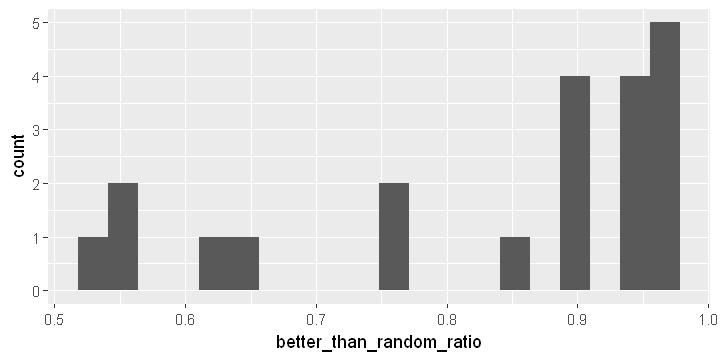

In [19]:
options(repr.plot.width=6, repr.plot.height=3)
calc_better_random() %>% ggplot(aes(better_than_random_ratio)) + geom_histogram(bins = 20)

In [20]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
calc_worse_random_algorithms <- function()
{
  random_guess <- evaluation_algorithms %>%
    group_by(dataset) %>%
    filter(algorithm == "random") %>%
    select(dataset, random_f1 = algorithm_f1)
  
  evaluation_algorithms %>%
    select(-algorithm_precision, -algorithm_recall, -algorithm_f20, -algorithm_f05) %>%
    left_join(random_guess, by="dataset") %>%
    filter(algorithm_f1 <= random_f1)
}

calc_worse_random_algorithms()

dataset,algorithm,variant,algorithm_f1,random_f1
dataset_aloi,CART,cart,0.000000000,0.03743316
dataset_aloi,random,random,0.037433155,0.03743316
dataset_iono,oneClassSVM_polynomial,oneClassSVM_polynomial,0.215912602,0.36434109
dataset_iono,oneClassSVM_sigmoid,oneClassSVM_sigmoid,0.217882209,0.36434109
dataset_iono,random,random,0.364341085,0.36434109
dataset_kdd,naiveBayes,nb,0.000000000,0.00000000
dataset_kdd,random,random,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_03,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_05,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_08,0.000000000,0.00000000


algorithm,count
CART,2
DBSCAN,3
kmeans,6
LOF,8
naiveBayes,4
oneClassSVM_linear,4
oneClassSVM_polynomial,6
oneClassSVM_sigmoid,5
random,21
SVM_sigmoid,3


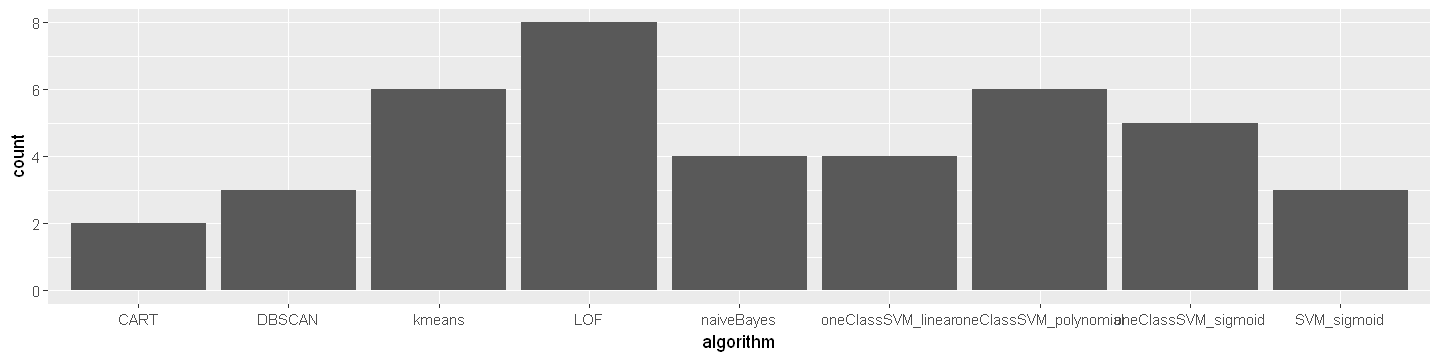

In [21]:
options(repr.plot.width=12, repr.plot.height=3)

calc_worse_random_algorithms() %>% distinct(dataset, algorithm) %>% group_by(algorithm) %>% summarise(count = n())

calc_worse_random_algorithms() %>% filter(algorithm != "random") %>% distinct(dataset, algorithm) %>% group_by(algorithm) %>% summarise(count = n()) %>%
  ggplot(aes(algorithm, count)) + geom_bar(stat = "identity")

# 2) Diversity Performance Study

In [22]:
change_numeric_to_binary <- function(dataset, columnName)
{
  if(columnName %in% colnames(dataset))
  {
    outlierRatio <- prop.table(table(dataset$outlier))["yes"]
    dataset[[columnName]] <- ifelse(dataset[[columnName]] > quantile(dataset[[columnName]], prob = 1 - outlierRatio), "yes", "no")
    dataset[[columnName]] <- dataset[[columnName]] %>% factor(levels = c("yes", "no"))
  }
  
  return(dataset)
}

normalize_factors <- function(dataset)
{
  dataset$dbscan_0.3 <- factor(dataset$dbscan_0.3, levels = c("yes", "no"))
  dataset$dbscan_0.5 <- factor(dataset$dbscan_0.5, levels = c("yes", "no"))
  dataset$dbscan_0.7 <- factor(dataset$dbscan_0.7, levels = c("yes", "no"))
  dataset$dbscan_0.9 <- factor(dataset$dbscan_0.9, levels = c("yes", "no"))
  dataset$dbscan_1.1 <- factor(dataset$dbscan_1.1, levels = c("yes", "no"))
  dataset$oneClassSVM_linear <- factor(dataset$oneClassSVM_linear, levels = c("yes", "no"))
  dataset$oneClassSVM_polynomial <- factor(dataset$oneClassSVM_polynomial, levels = c("yes", "no"))
  dataset$oneClassSVM_radial <- factor(dataset$oneClassSVM_radial, levels = c("yes", "no"))
  dataset$oneClassSVM_sigmoid <- factor(dataset$oneClassSVM_sigmoid, levels = c("yes", "no"))
  dataset$outlier <- factor(dataset$outlier, levels = c("yes", "no"))
  return(dataset)
}

In [23]:
process_for_diversity <- function()
{
  datasets_df <- NULL

  for(dname in datasets)
  {
    dataset <- read.csv(paste0("results_algorithms_joined/", dname, ".csv"))
    dataset <- normalize_factors(dataset)

    for(colname in colnames(dataset))
    {
      if (colname %in% c("cart", "kmeans_03","kmeans_05","kmeans_08","kmeans_14","kmeans_19","kmeans_25","kmeans_30","lof_03","lof_05","lof_08","lof_14","lof_19","lof_25","lof_30","nb","mlp","rf","SVM_linear","SVM_polynomial","SVM_radial","SVM_sigmoid"))
        dataset <- change_numeric_to_binary(dataset, colname)
    }

    dataset <- dataset %>%
      #select(outlier:SVM_sigmoid) %>%
      select(outlier, cart, rf, nb, mlp, SVM_linear, SVM_polynomial, SVM_radial, SVM_sigmoid,
            oneClassSVM_linear, oneClassSVM_polynomial, oneClassSVM_radial, oneClassSVM_sigmoid,
            lof_03, lof_05, lof_08, lof_14, lof_19, lof_25, lof_30,
            dbscan_0.3, dbscan_0.5, dbscan_0.7, dbscan_0.9, dbscan_1.1,
            kmeans_03, kmeans_05, kmeans_08, kmeans_14, kmeans_19, kmeans_25, kmeans_30) %>%
      mutate(dataset = rep(dname, nrow(dataset))) %>%
      select(dataset, everything())

      if (is.null(datasets_df))
        datasets_df <- dataset
      else
        datasets_df <- bind_rows(datasets_df, dataset)
  }

  return(datasets_df)
}
      
datasets_df <- process_for_diversity()

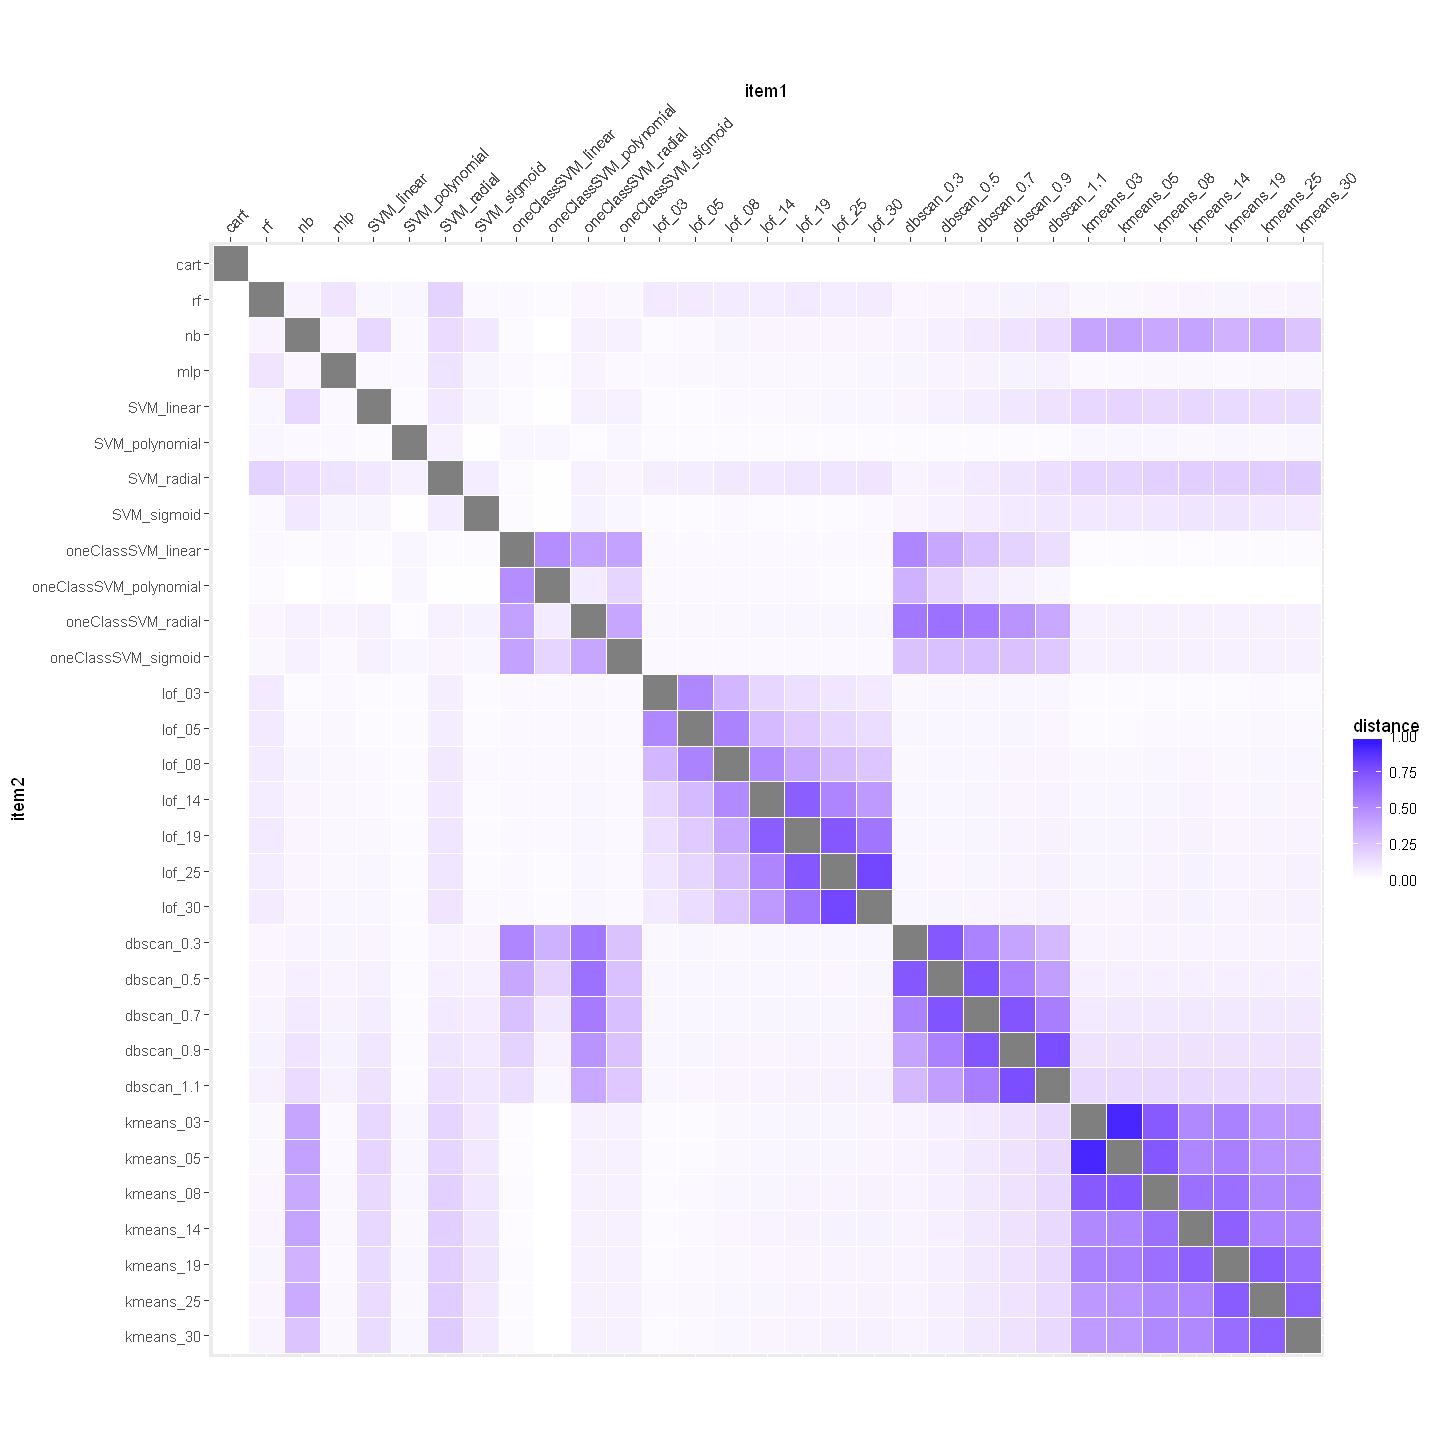

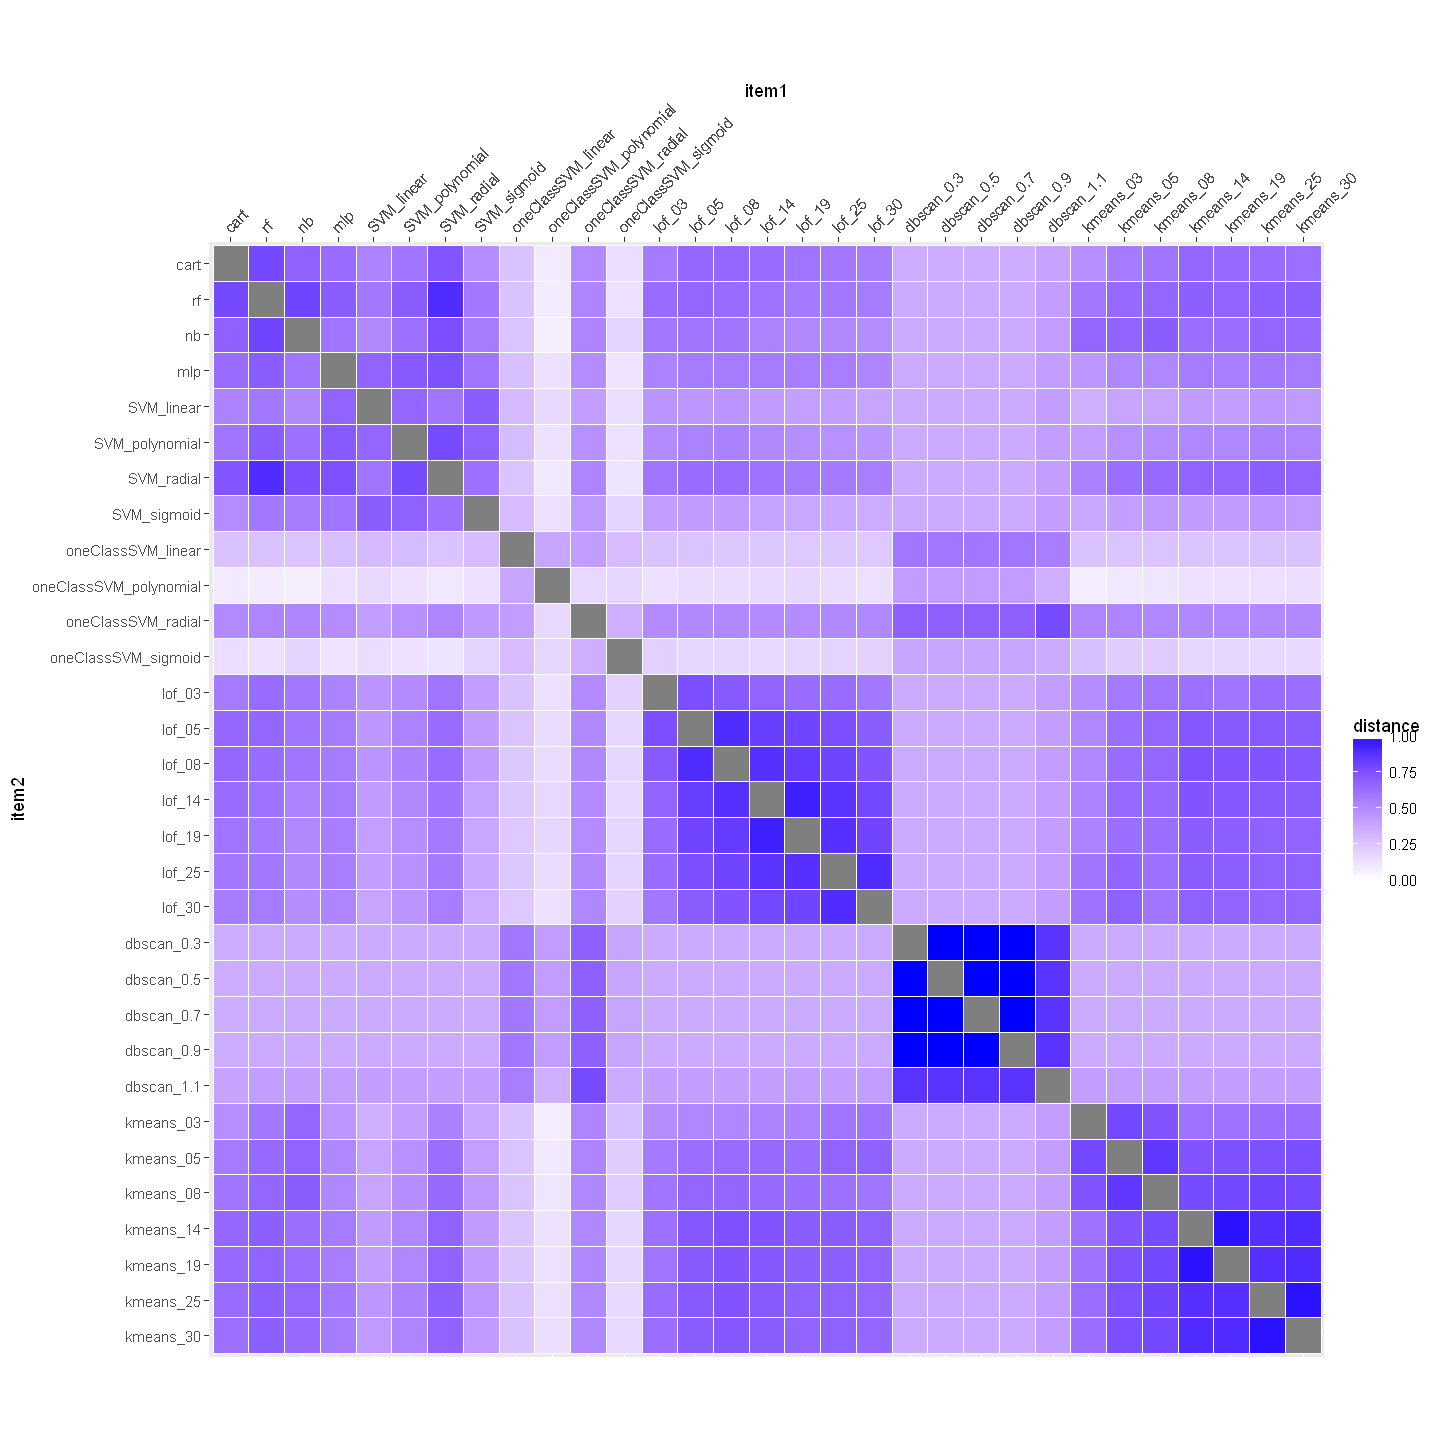

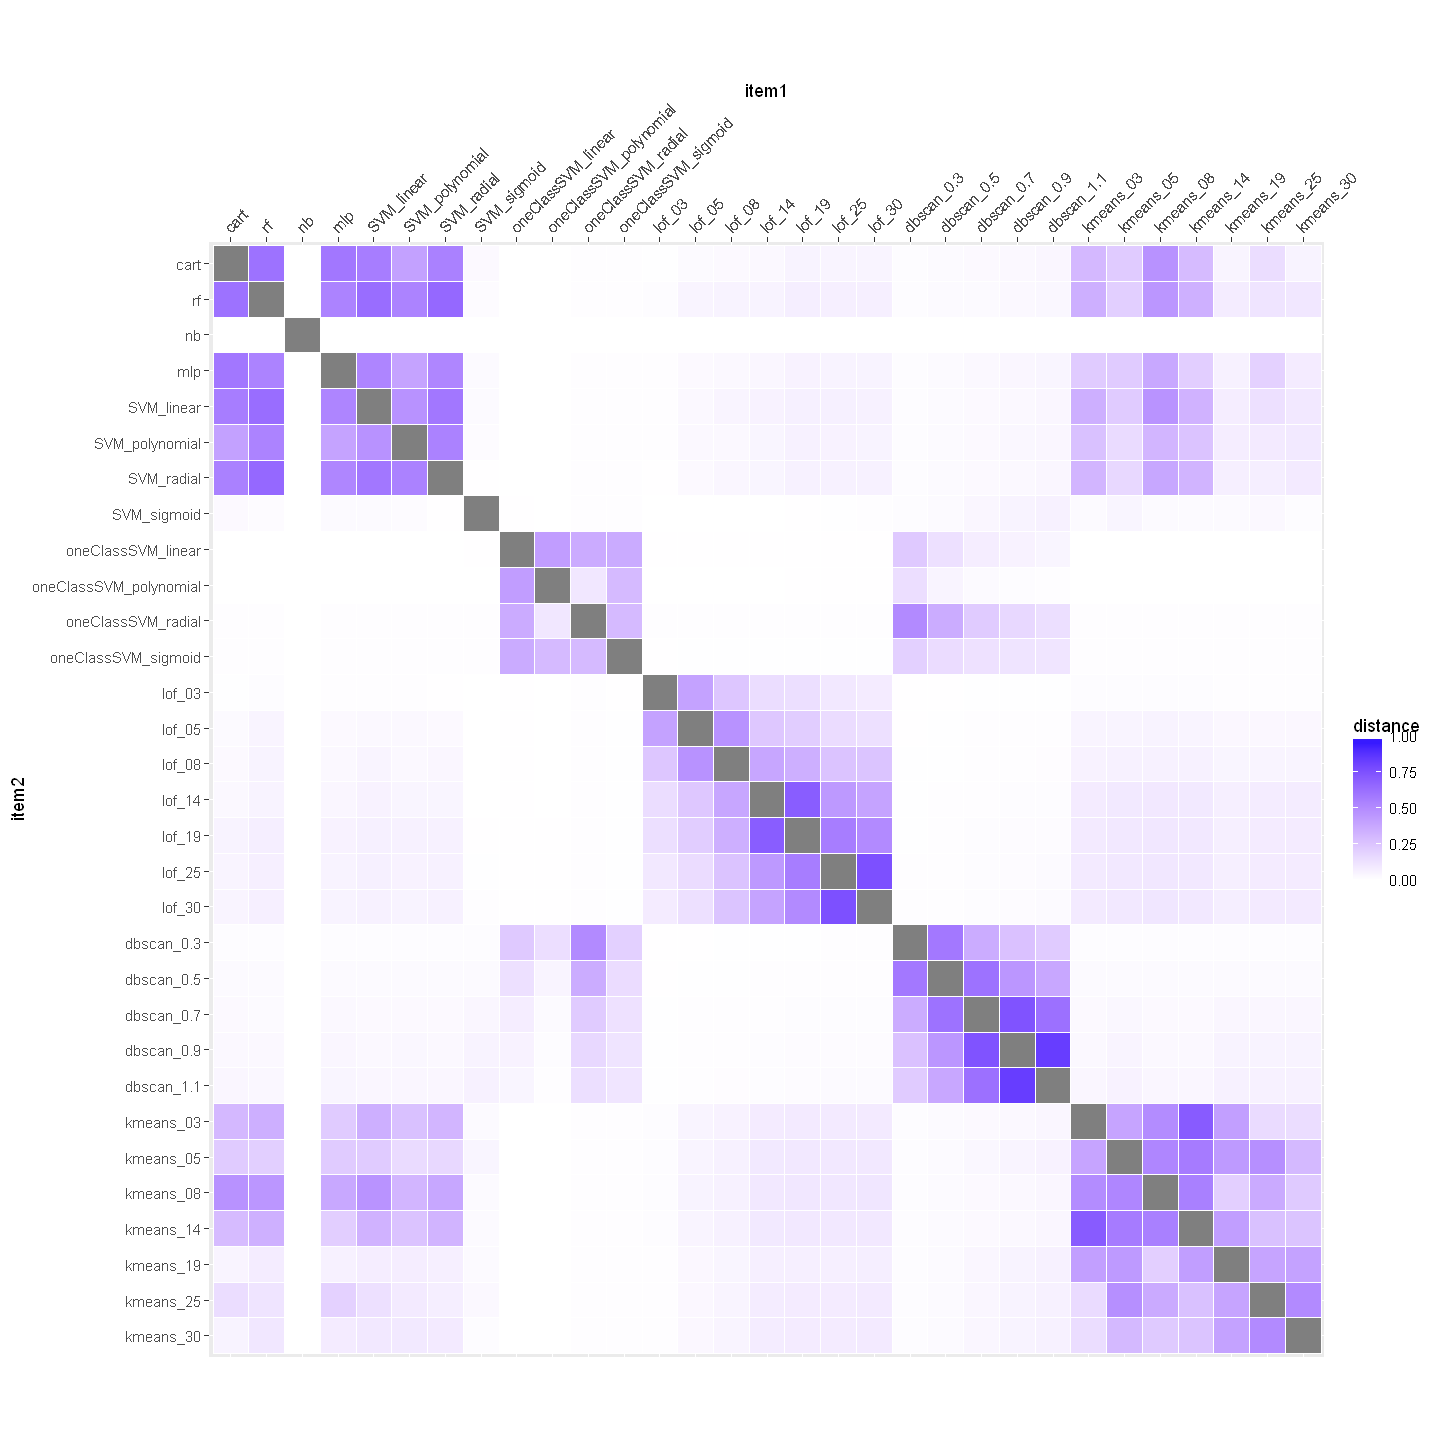

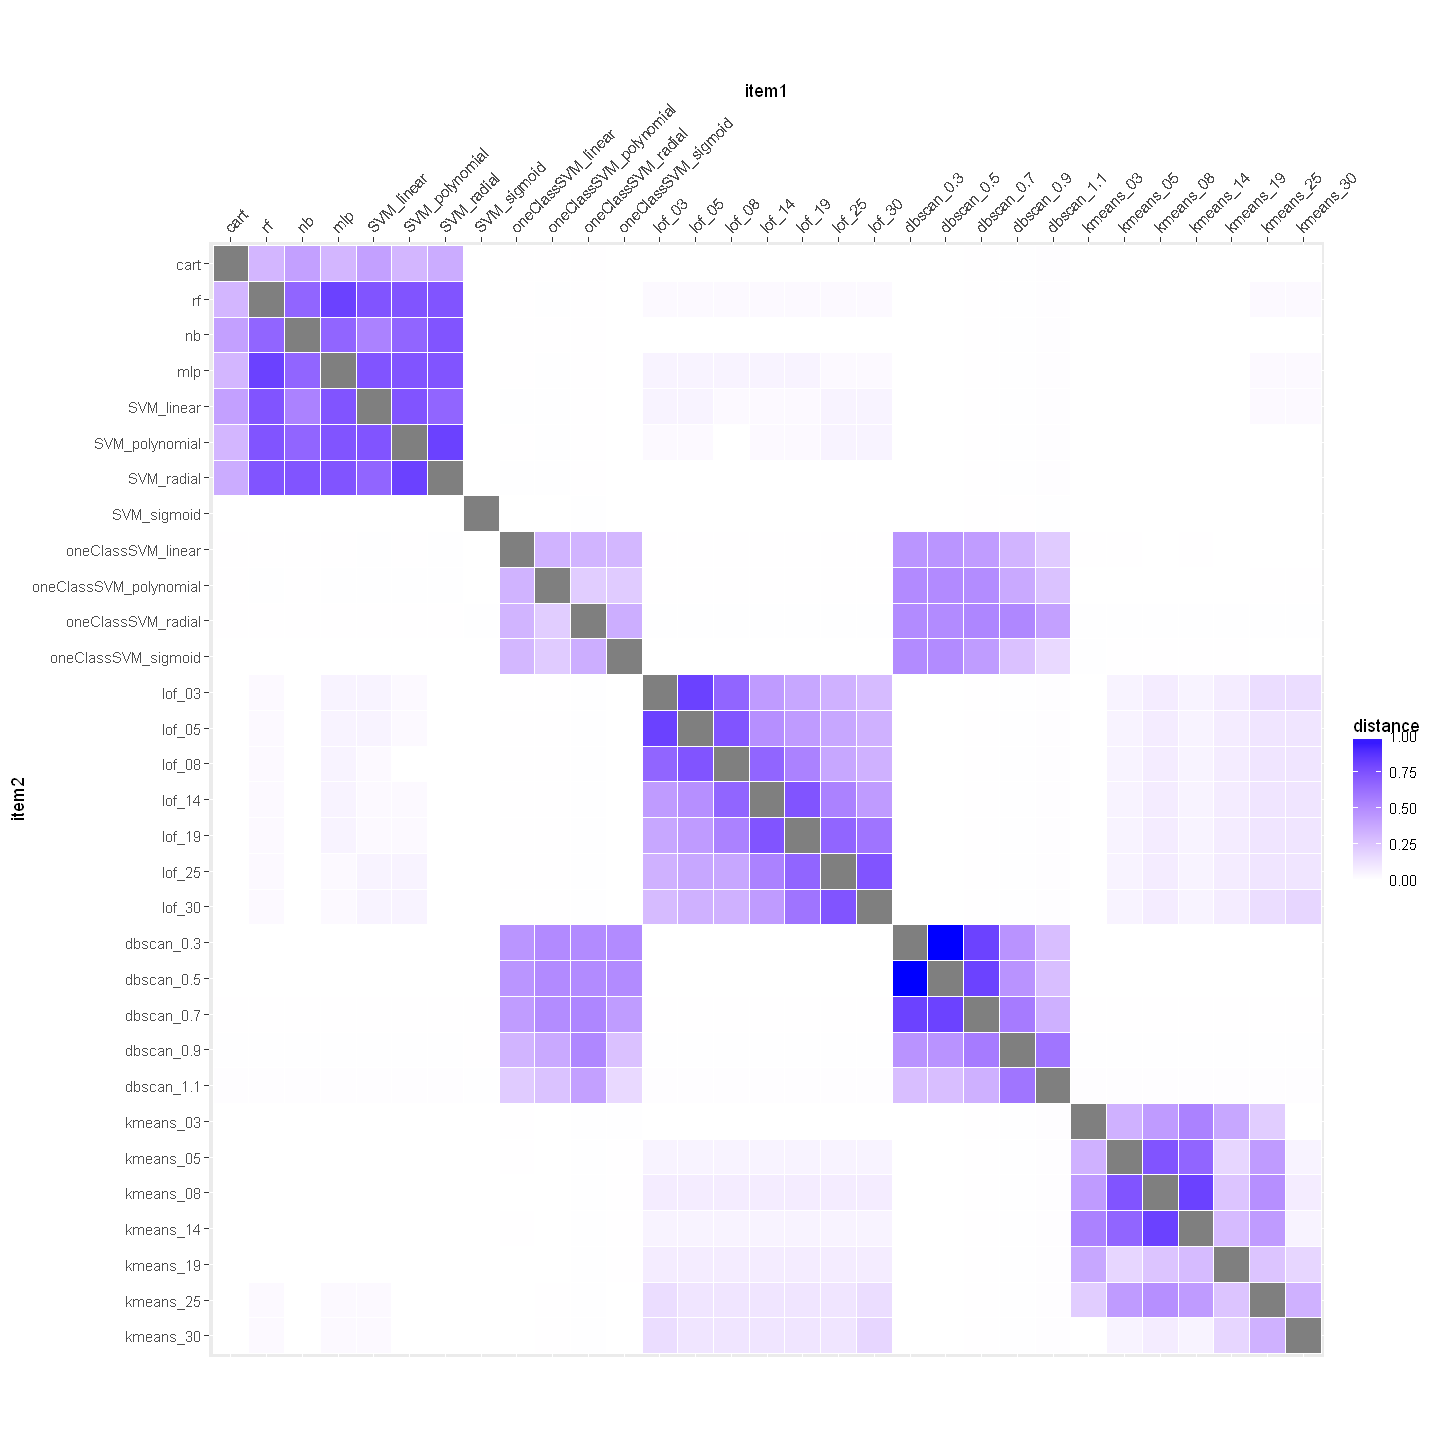

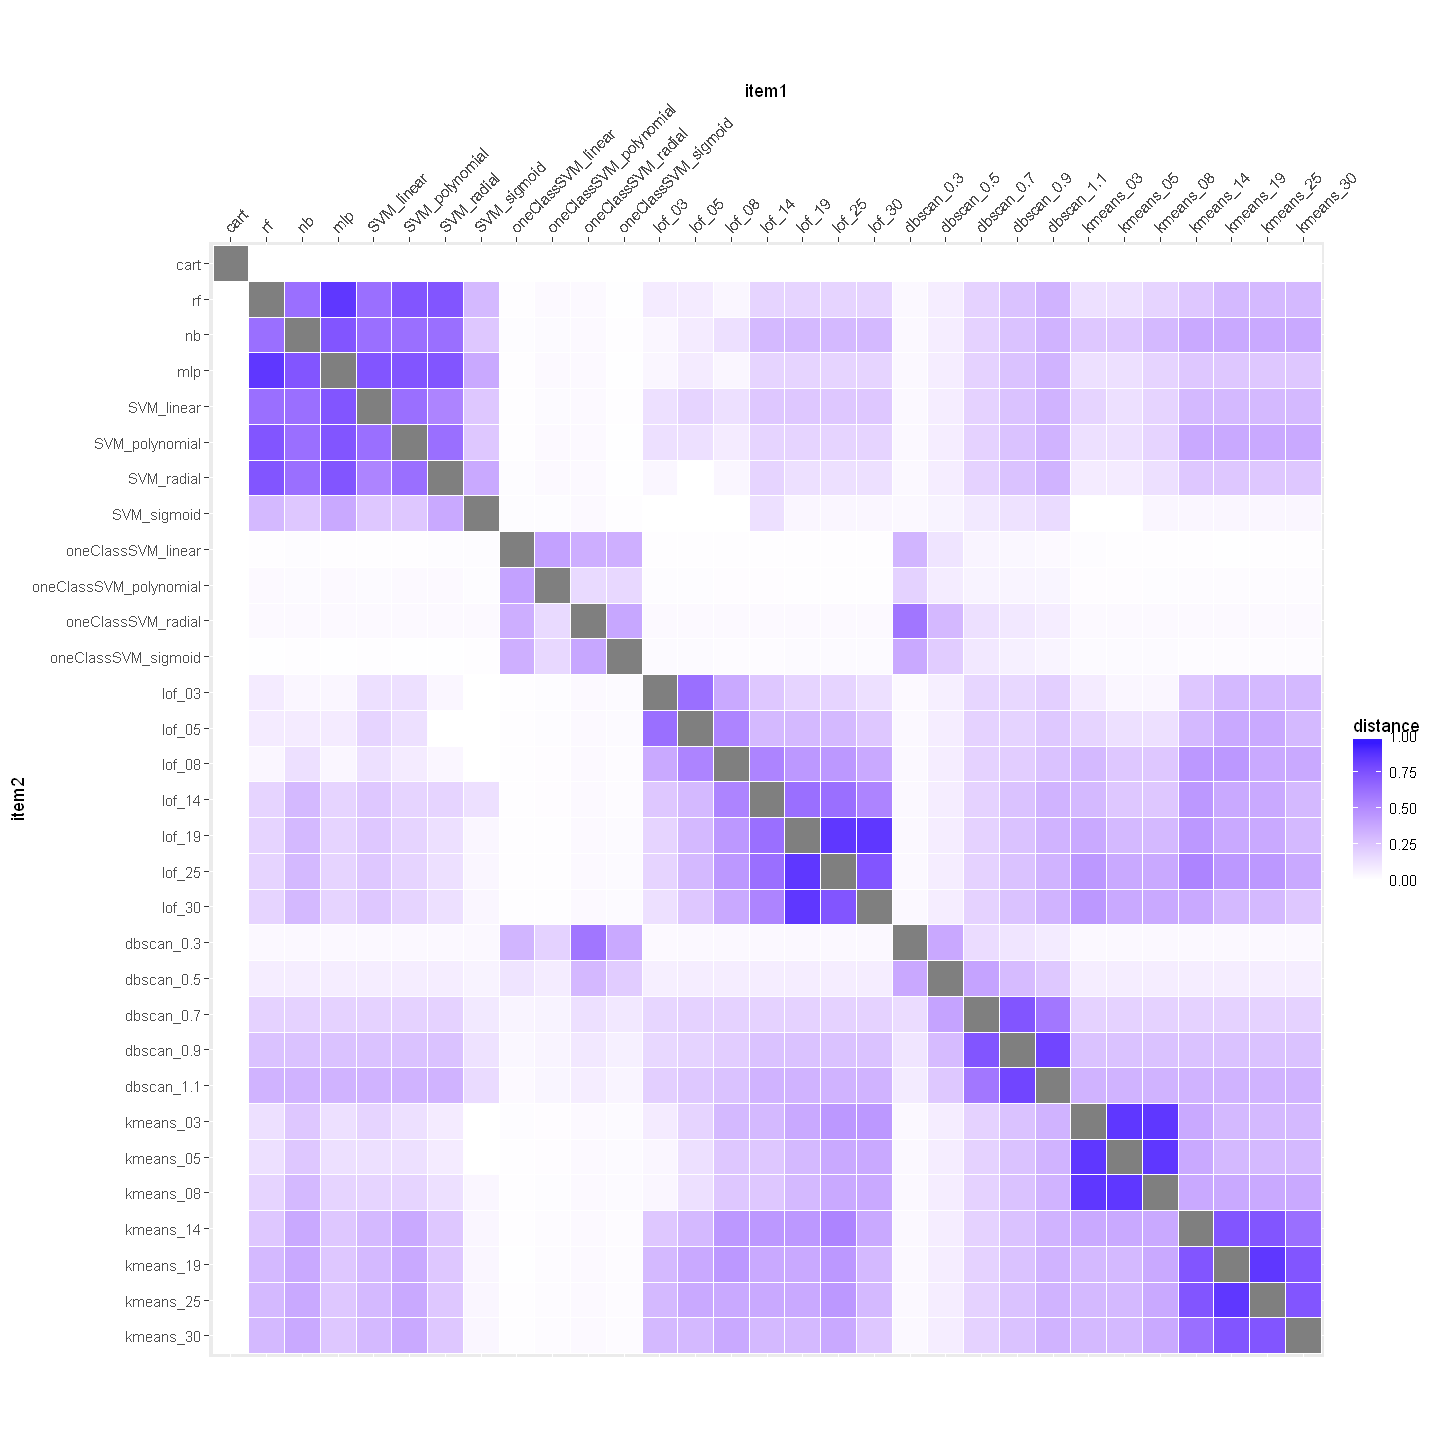

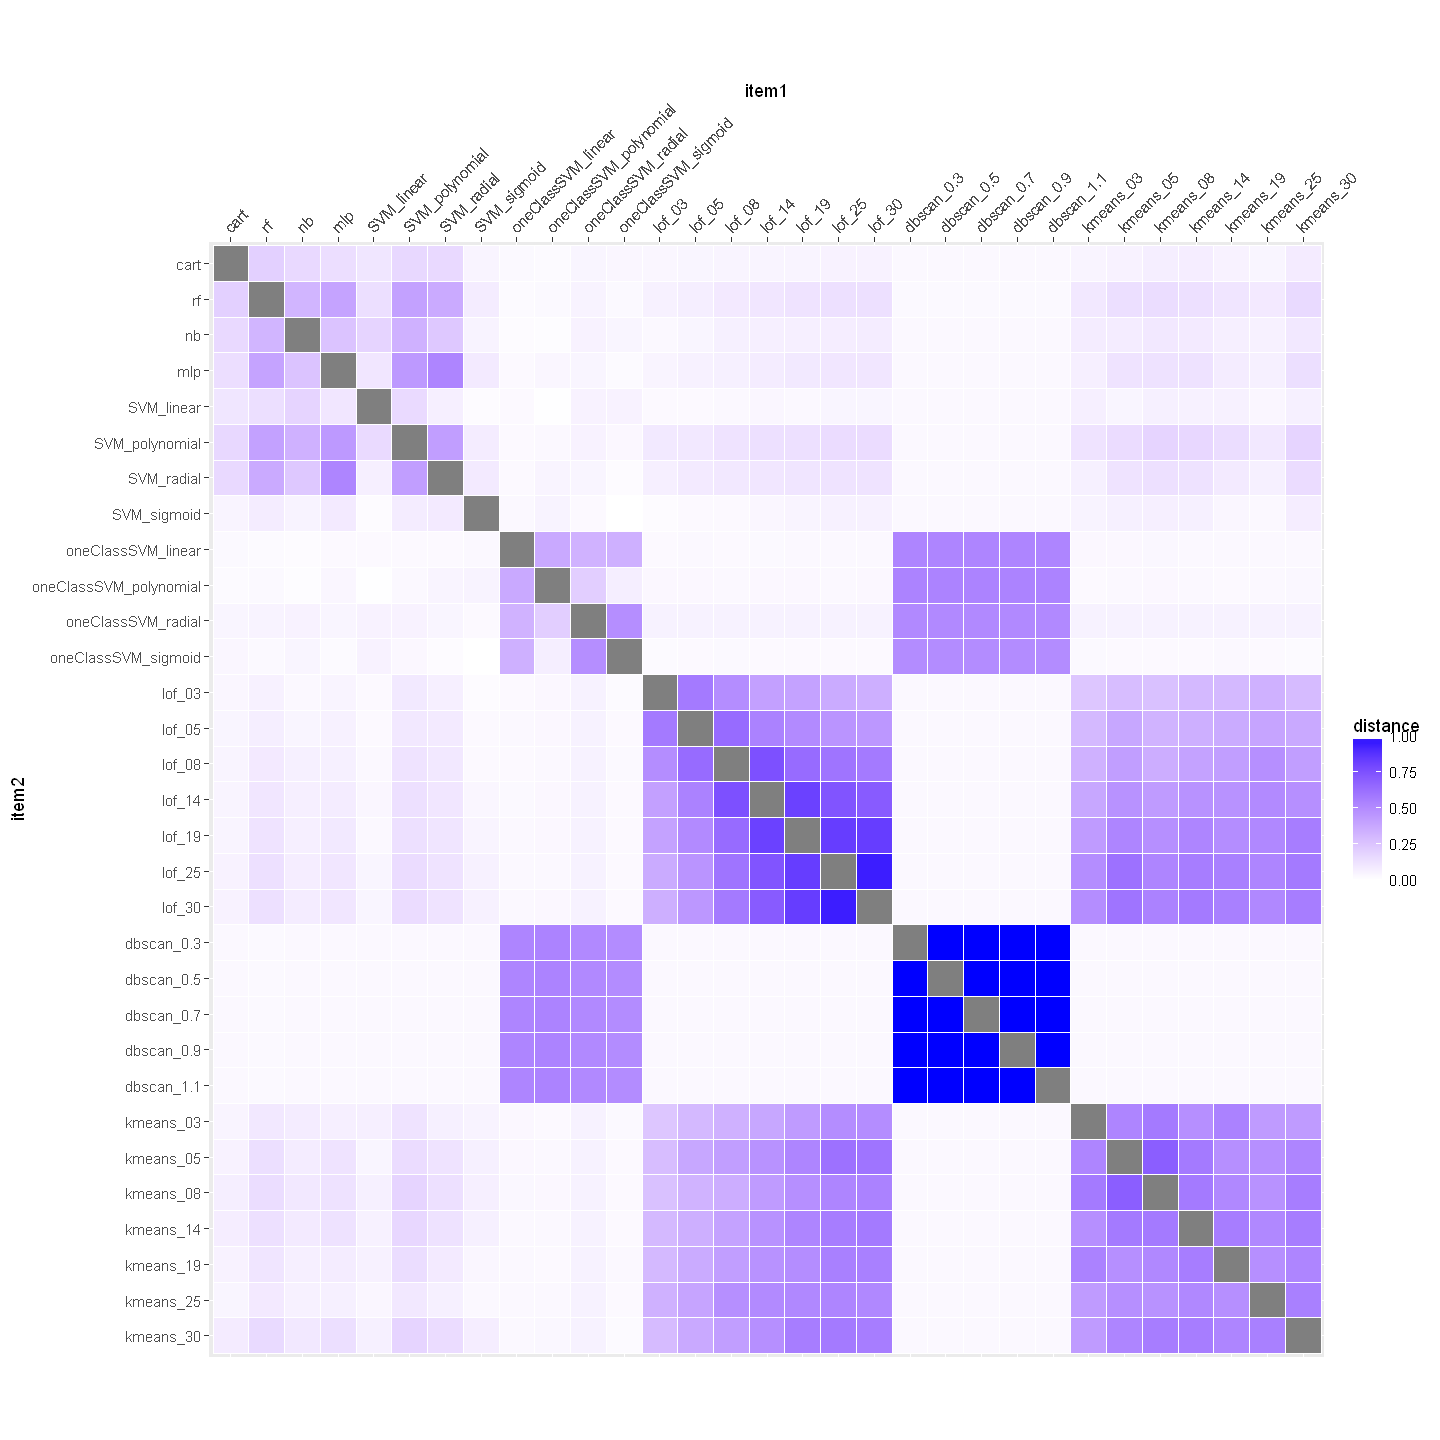

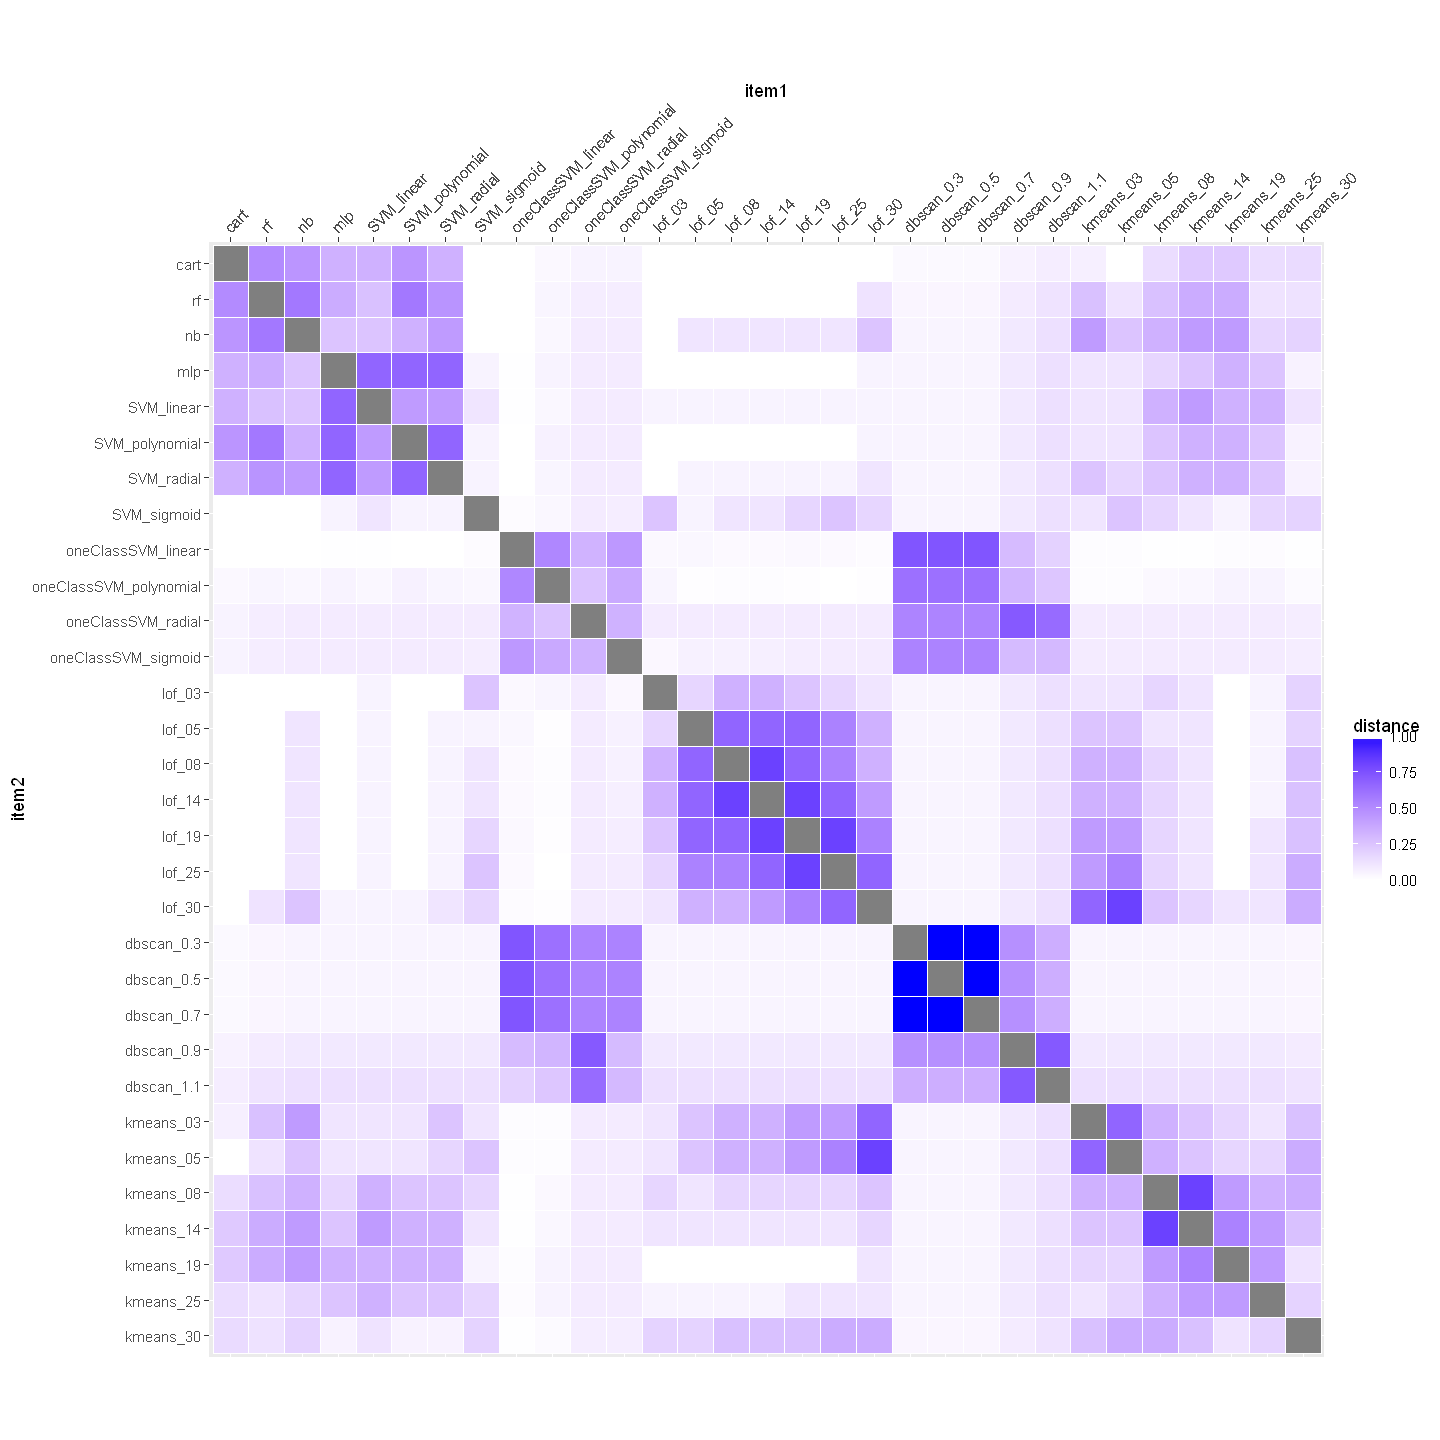

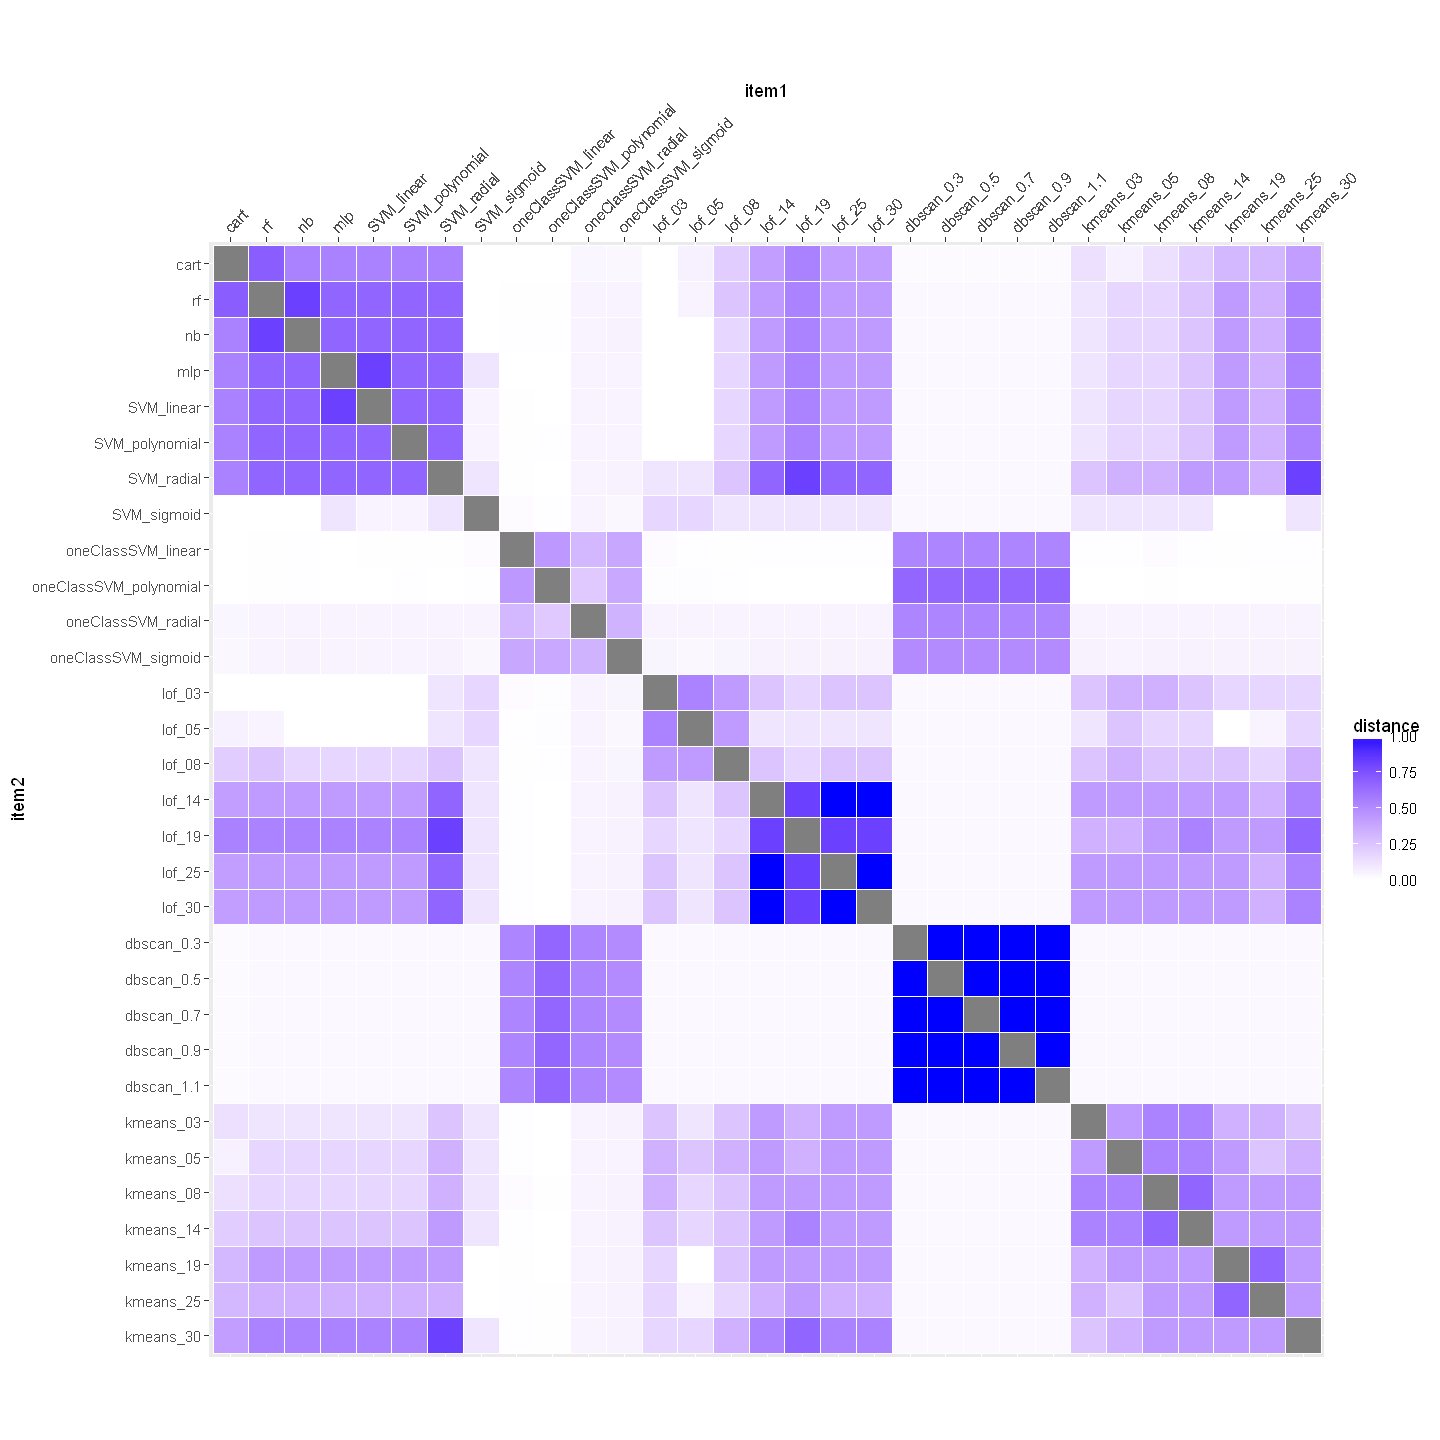

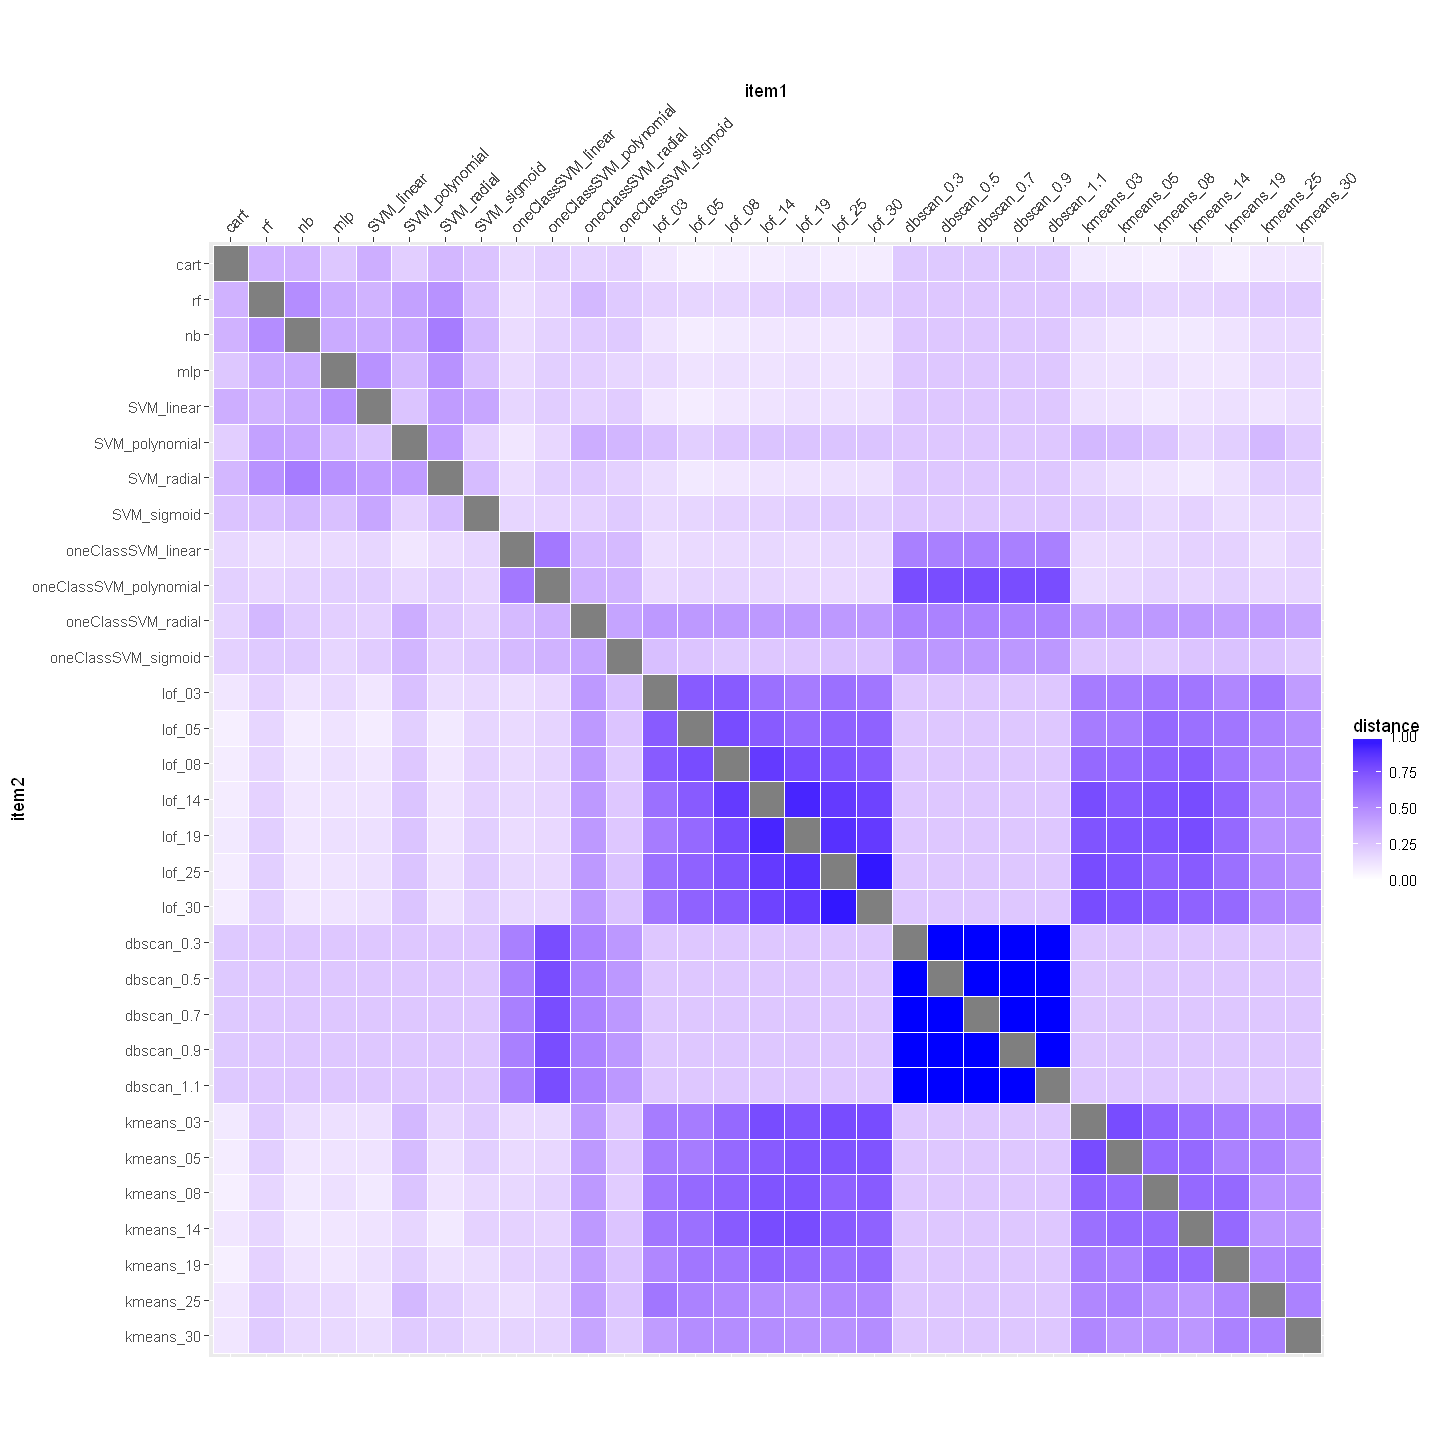

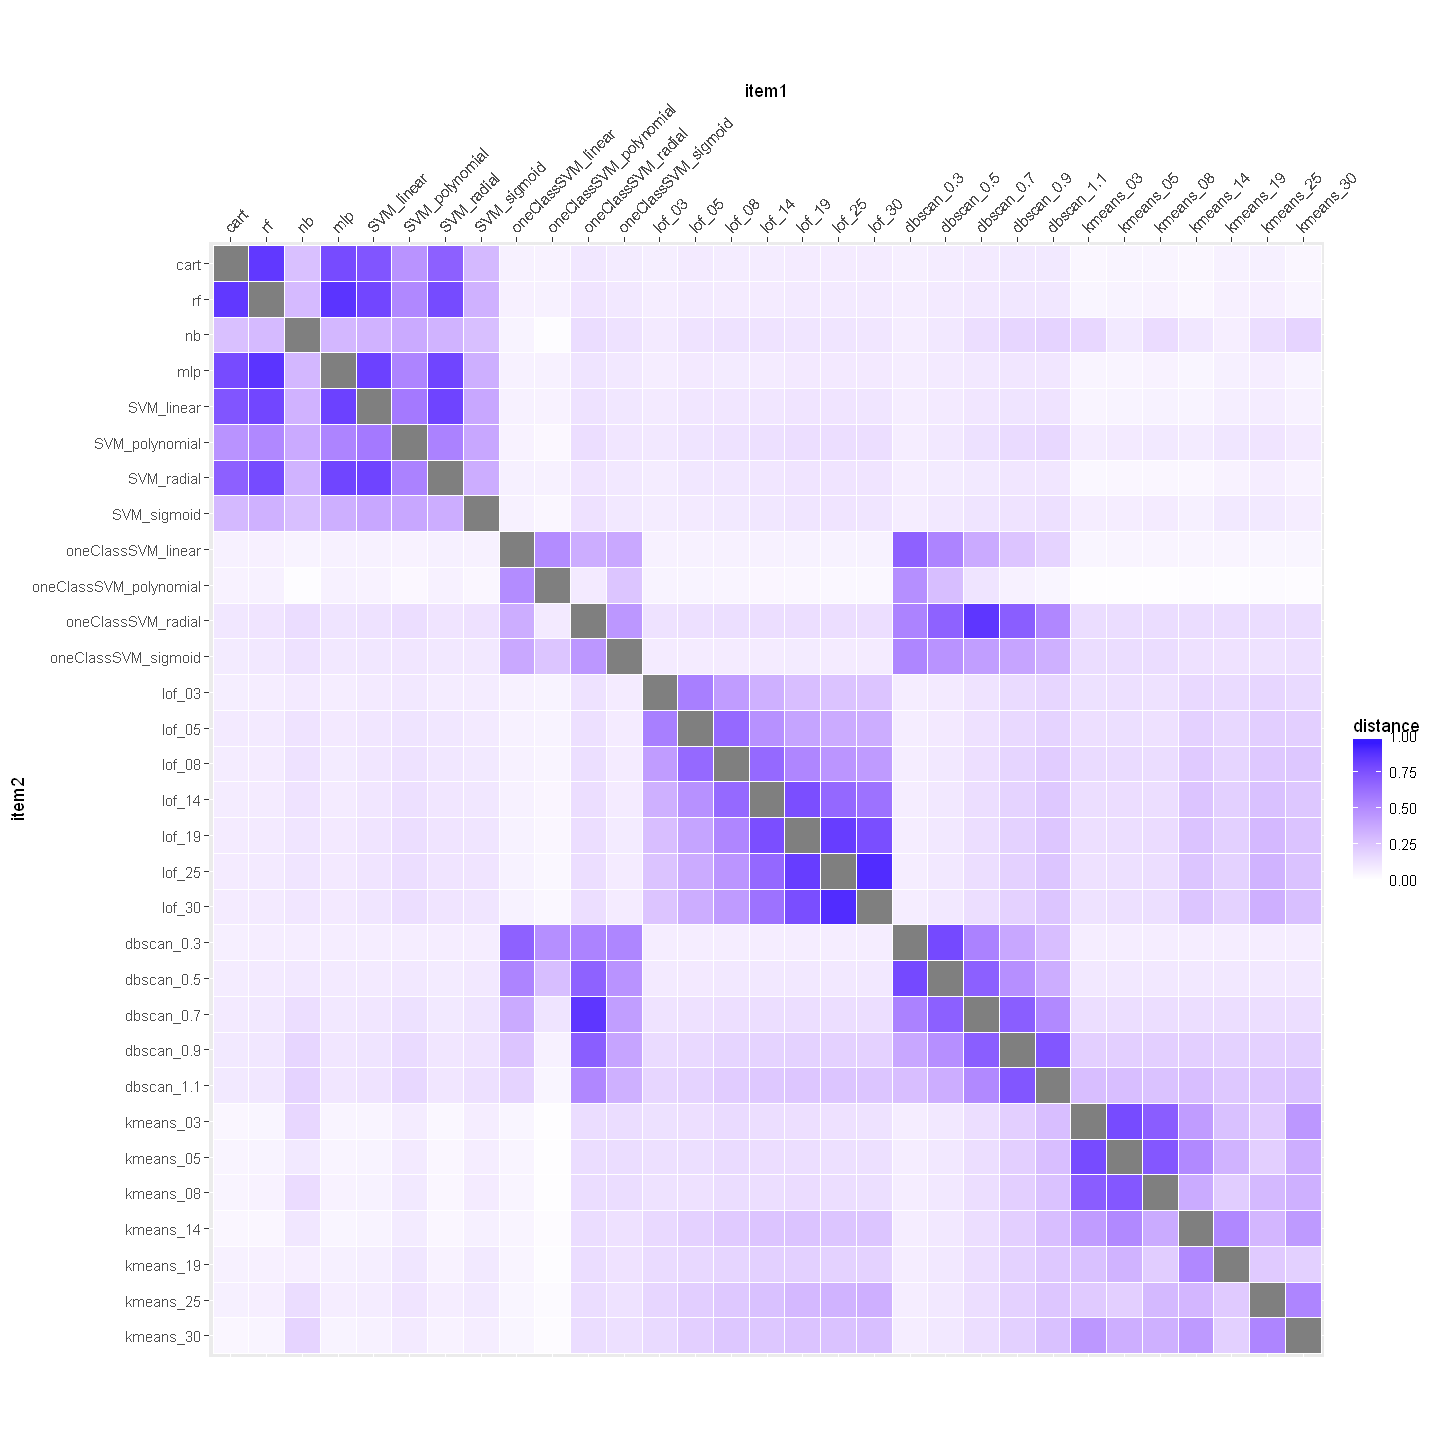

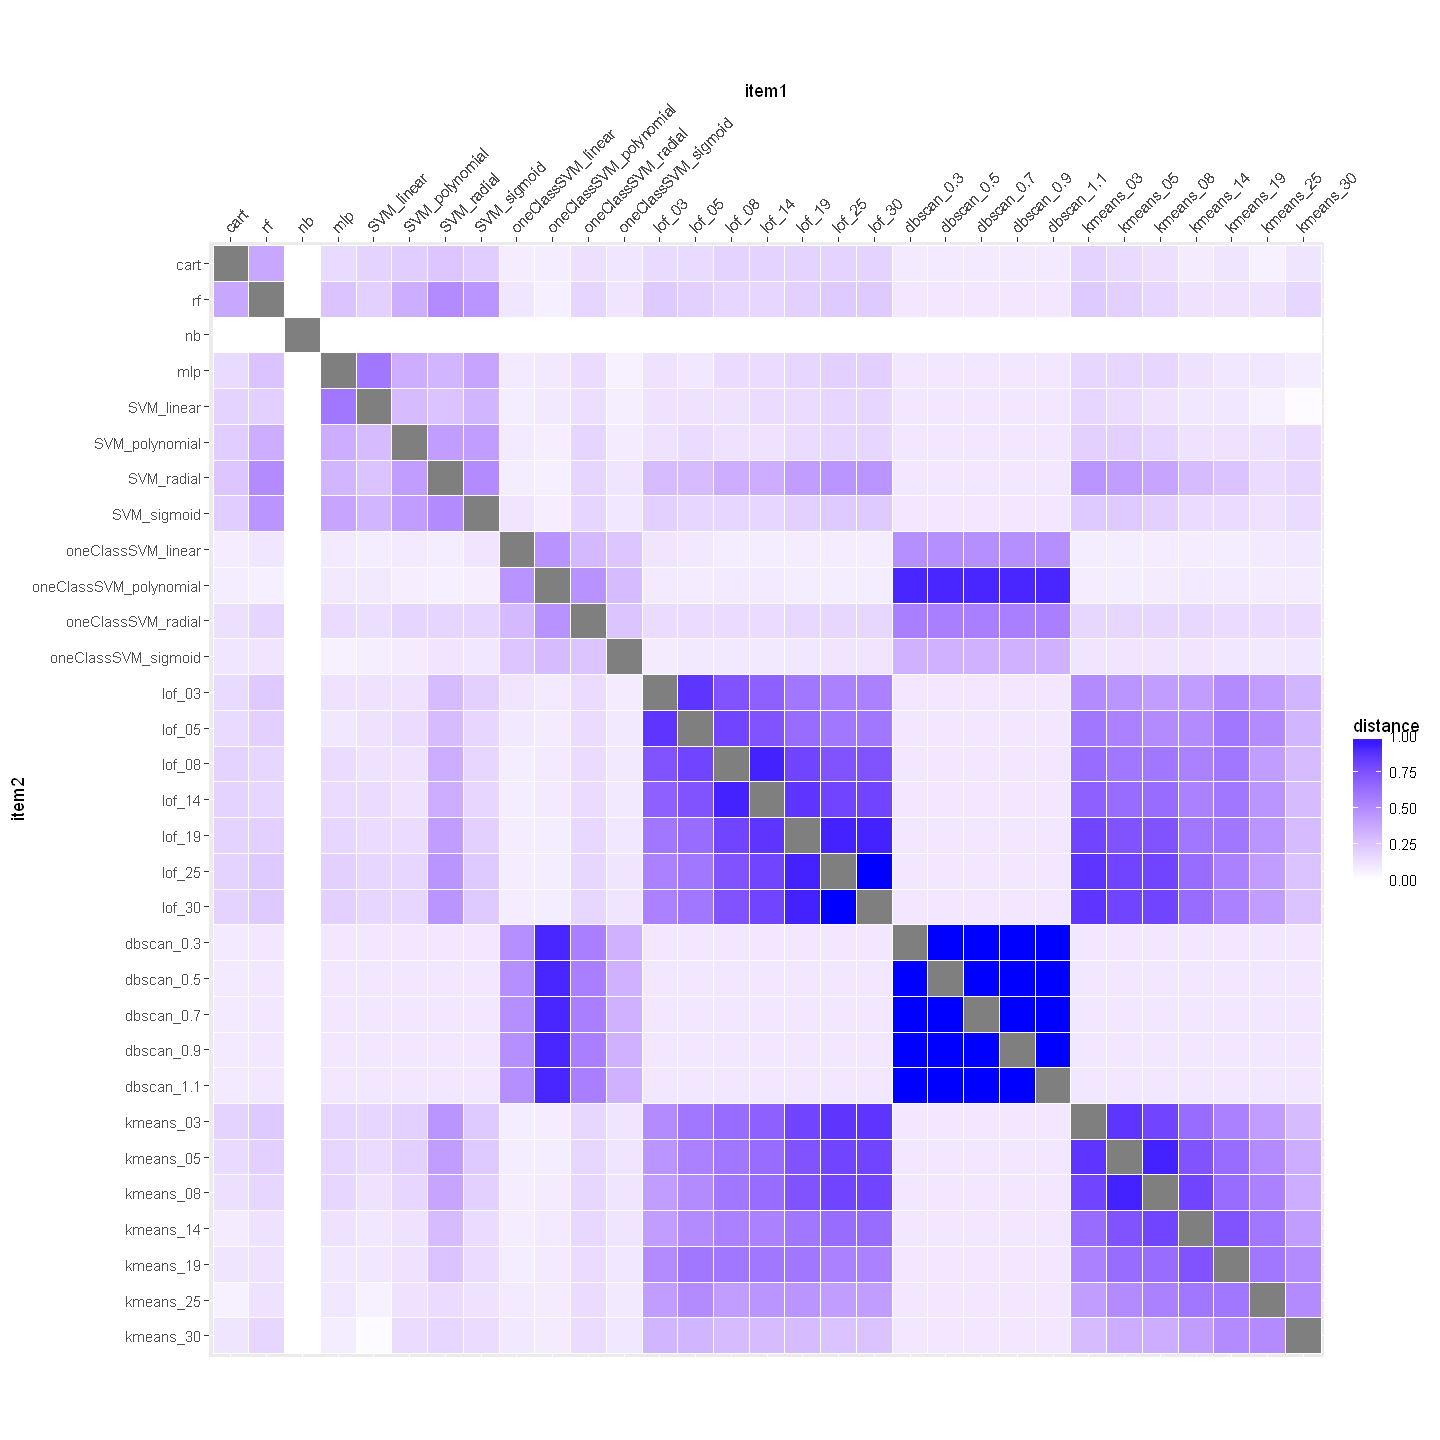

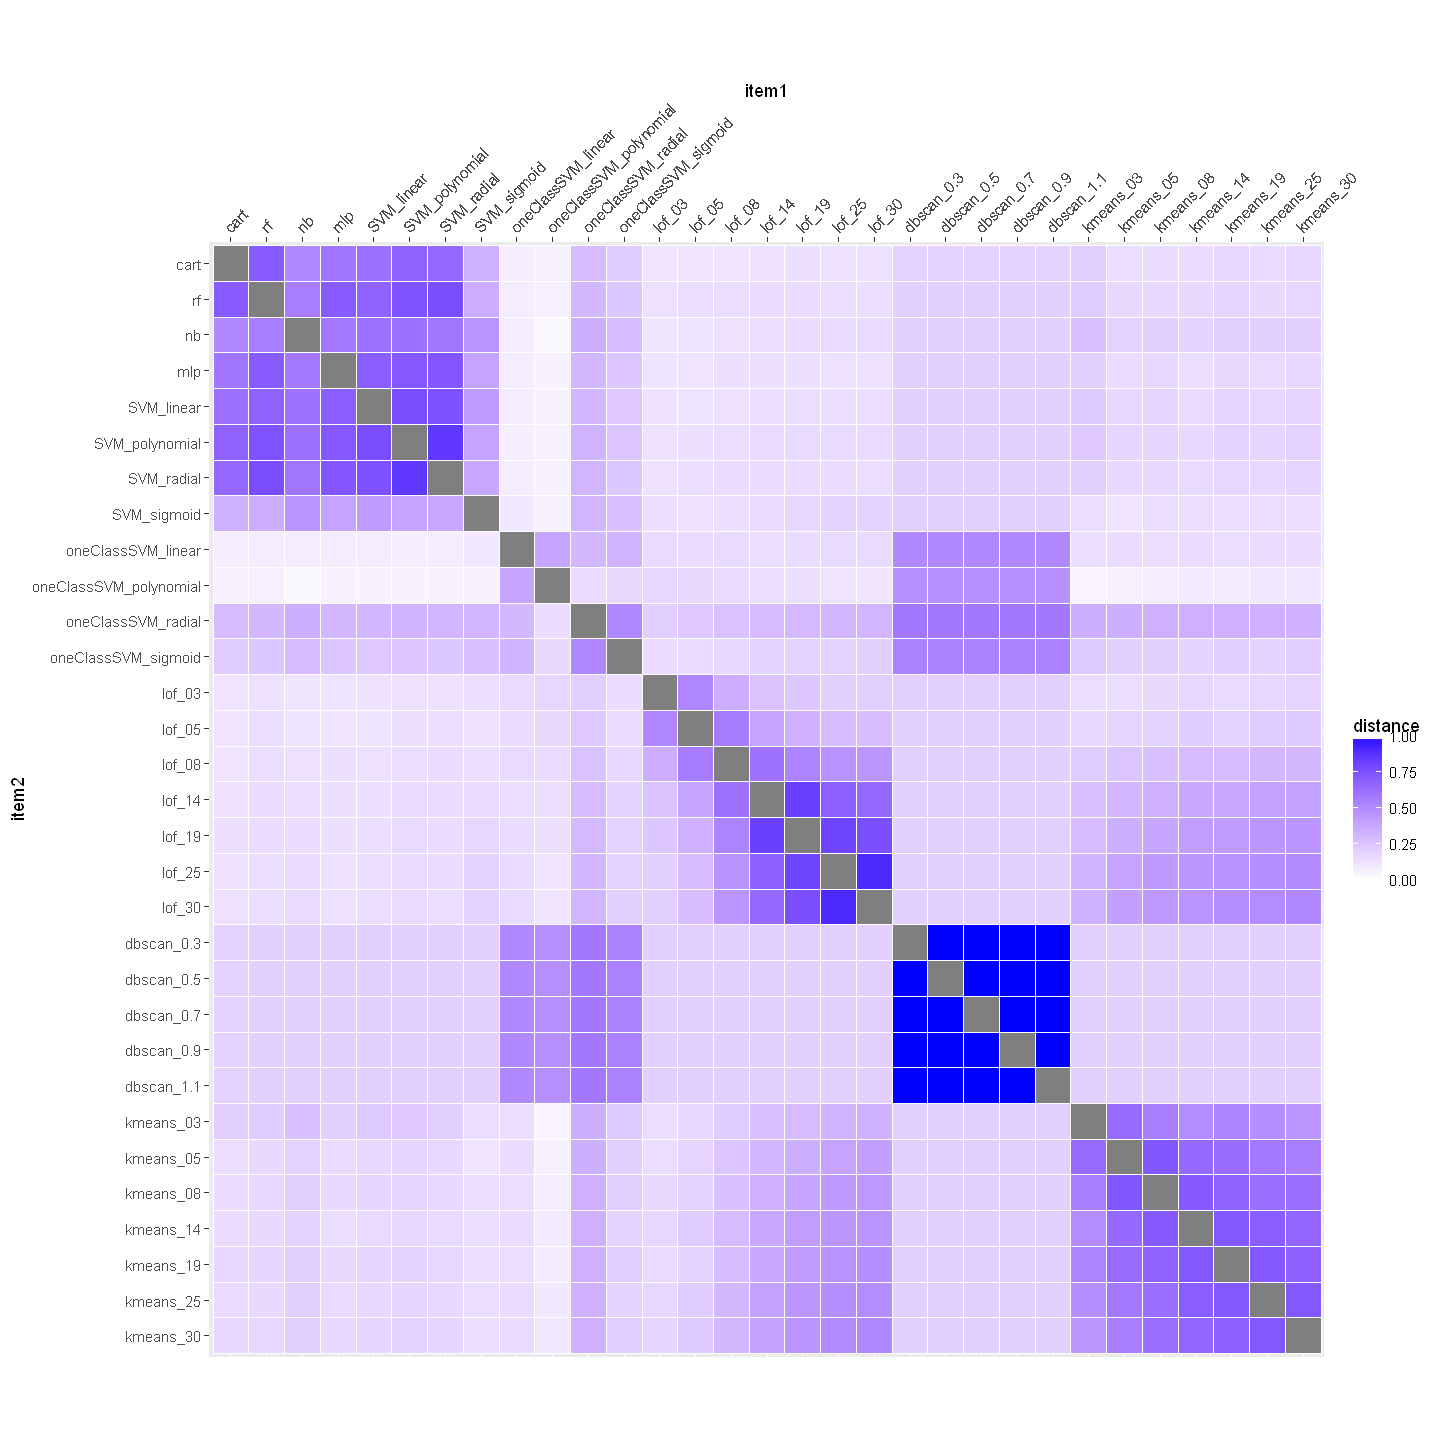

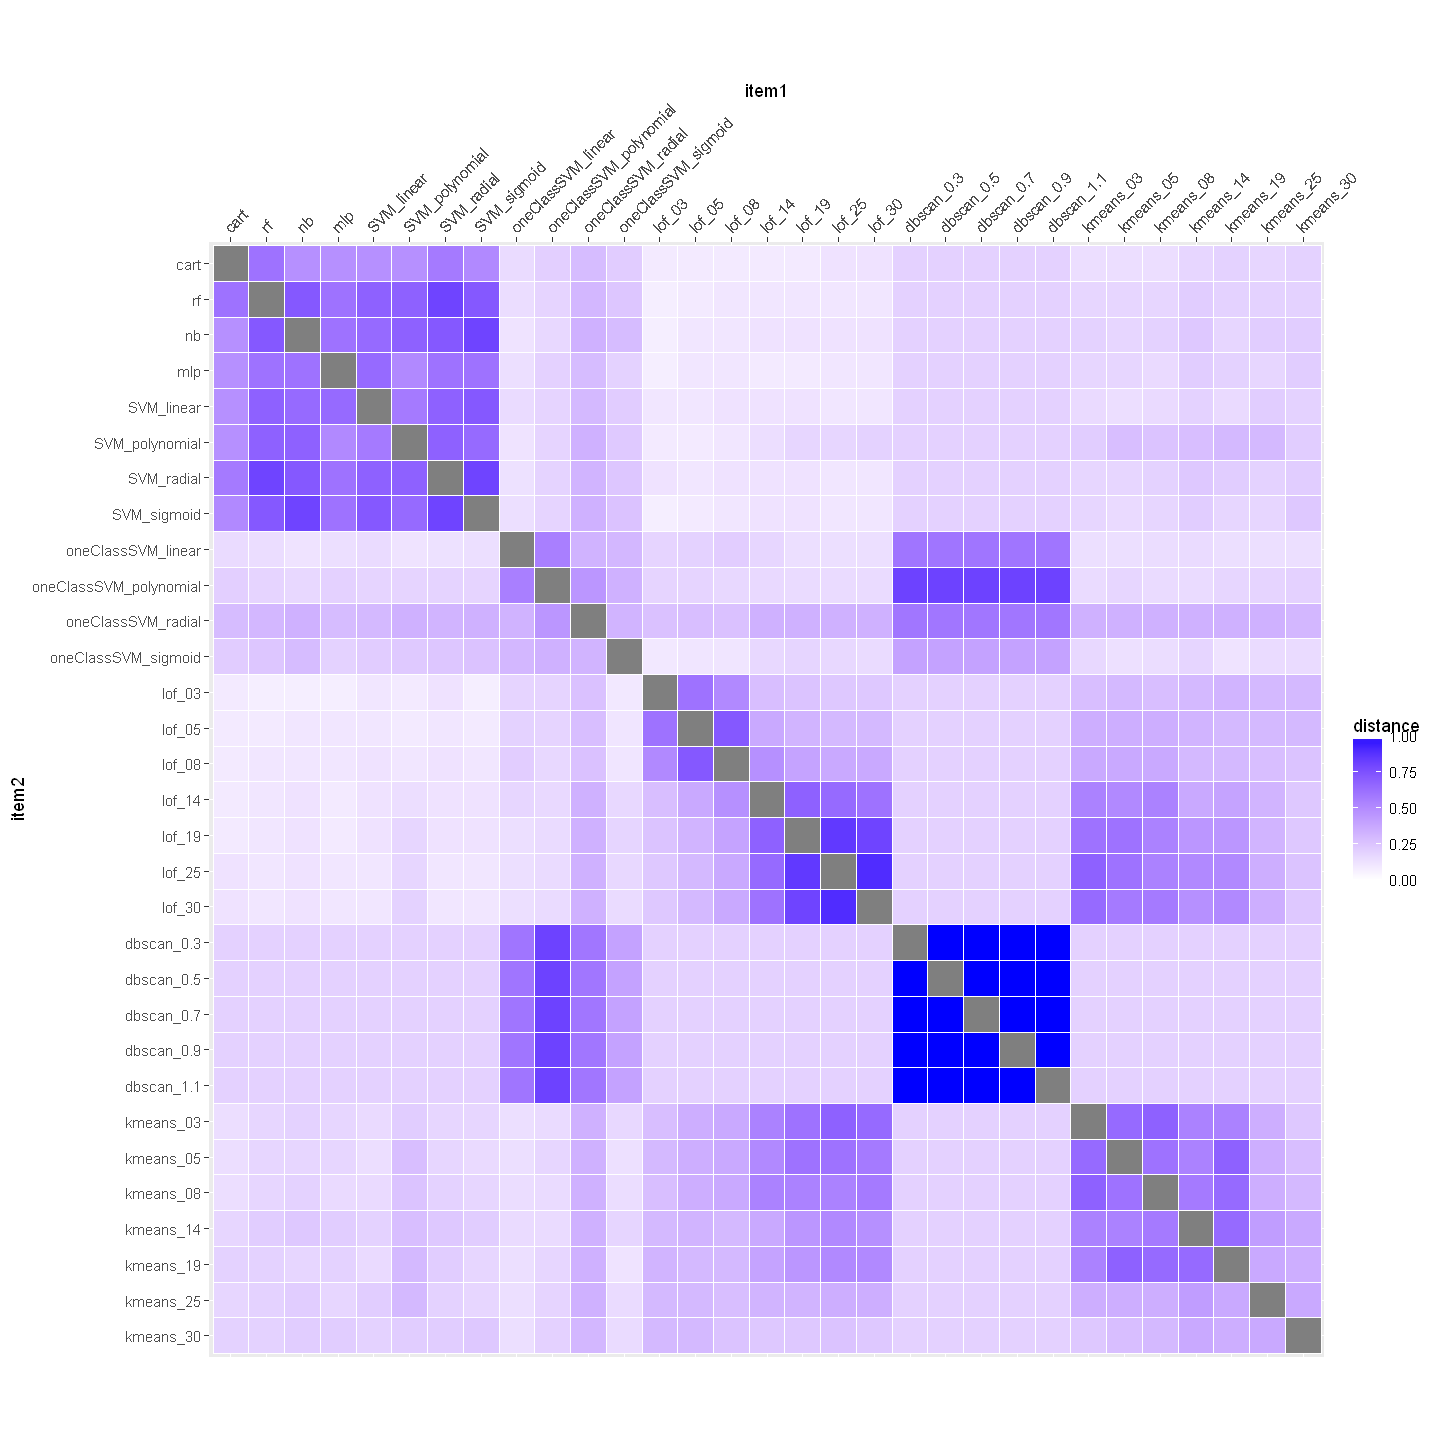

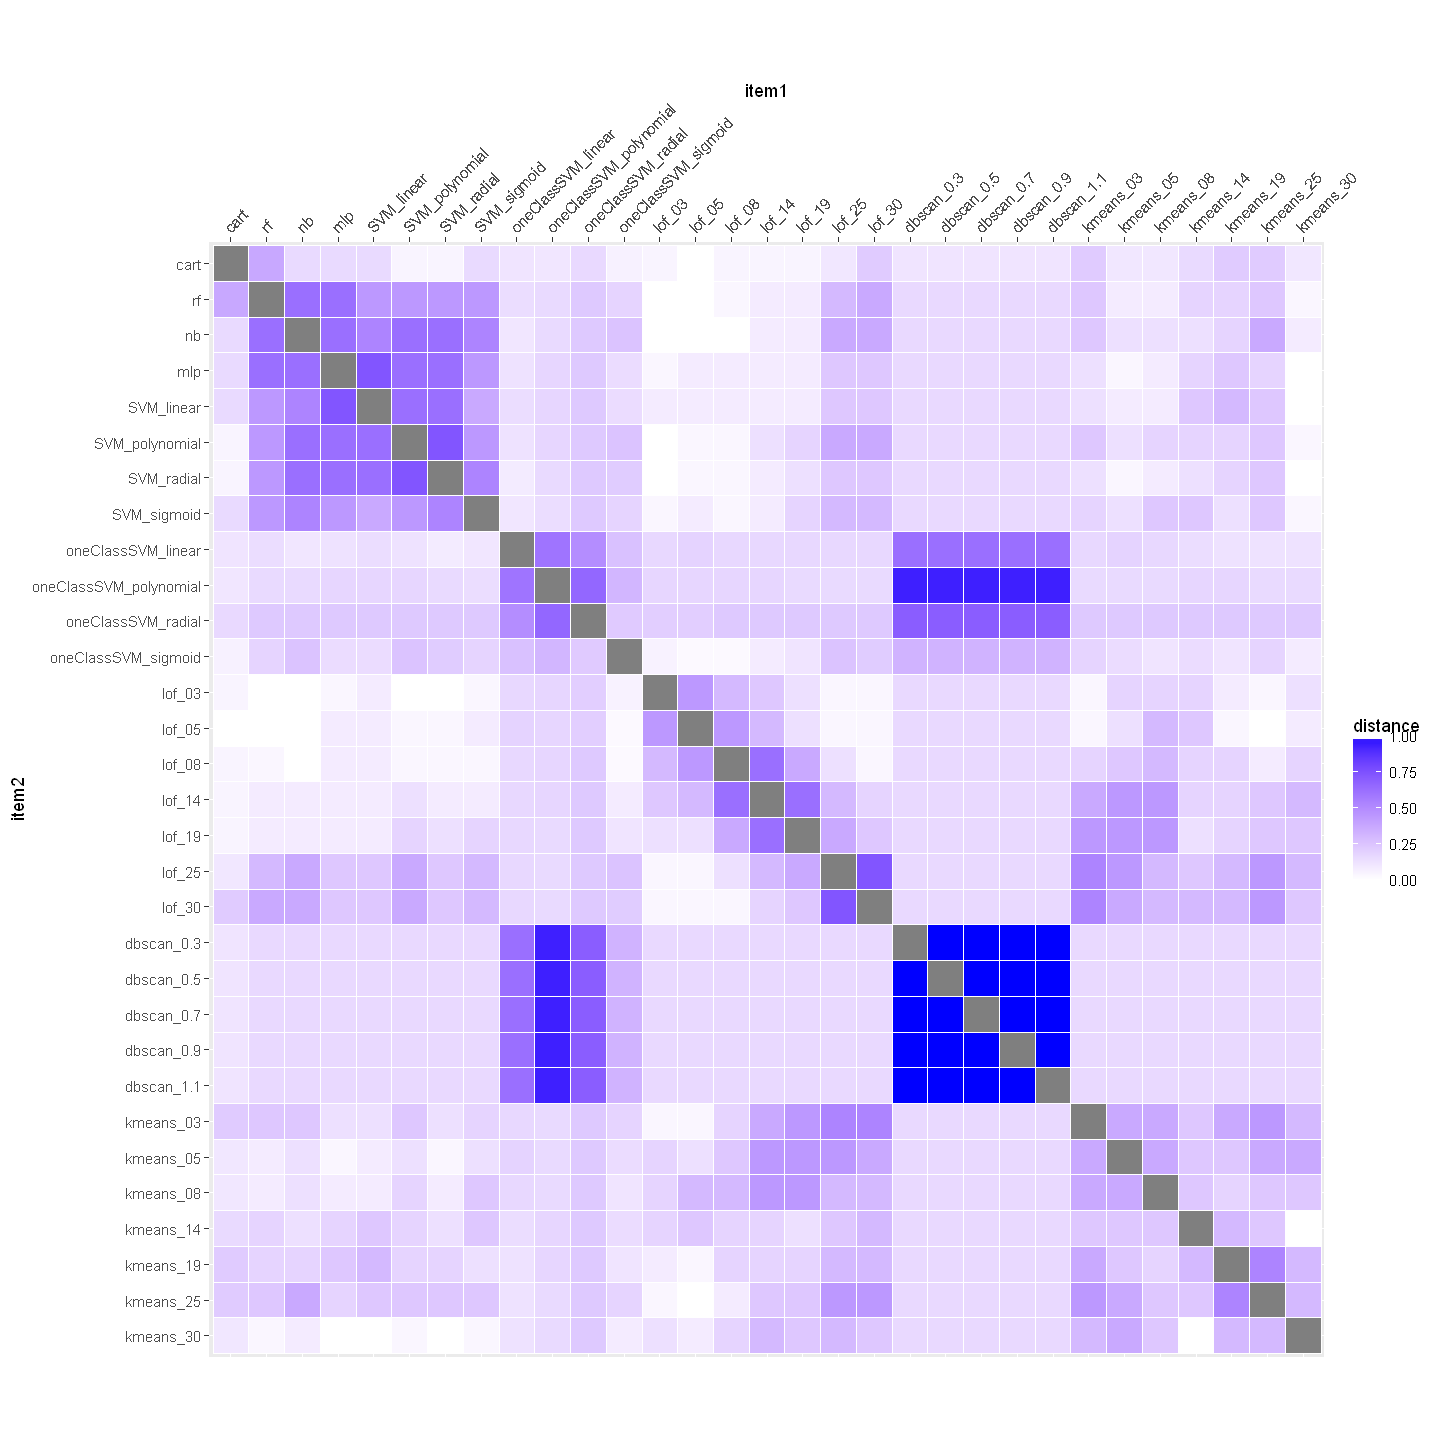

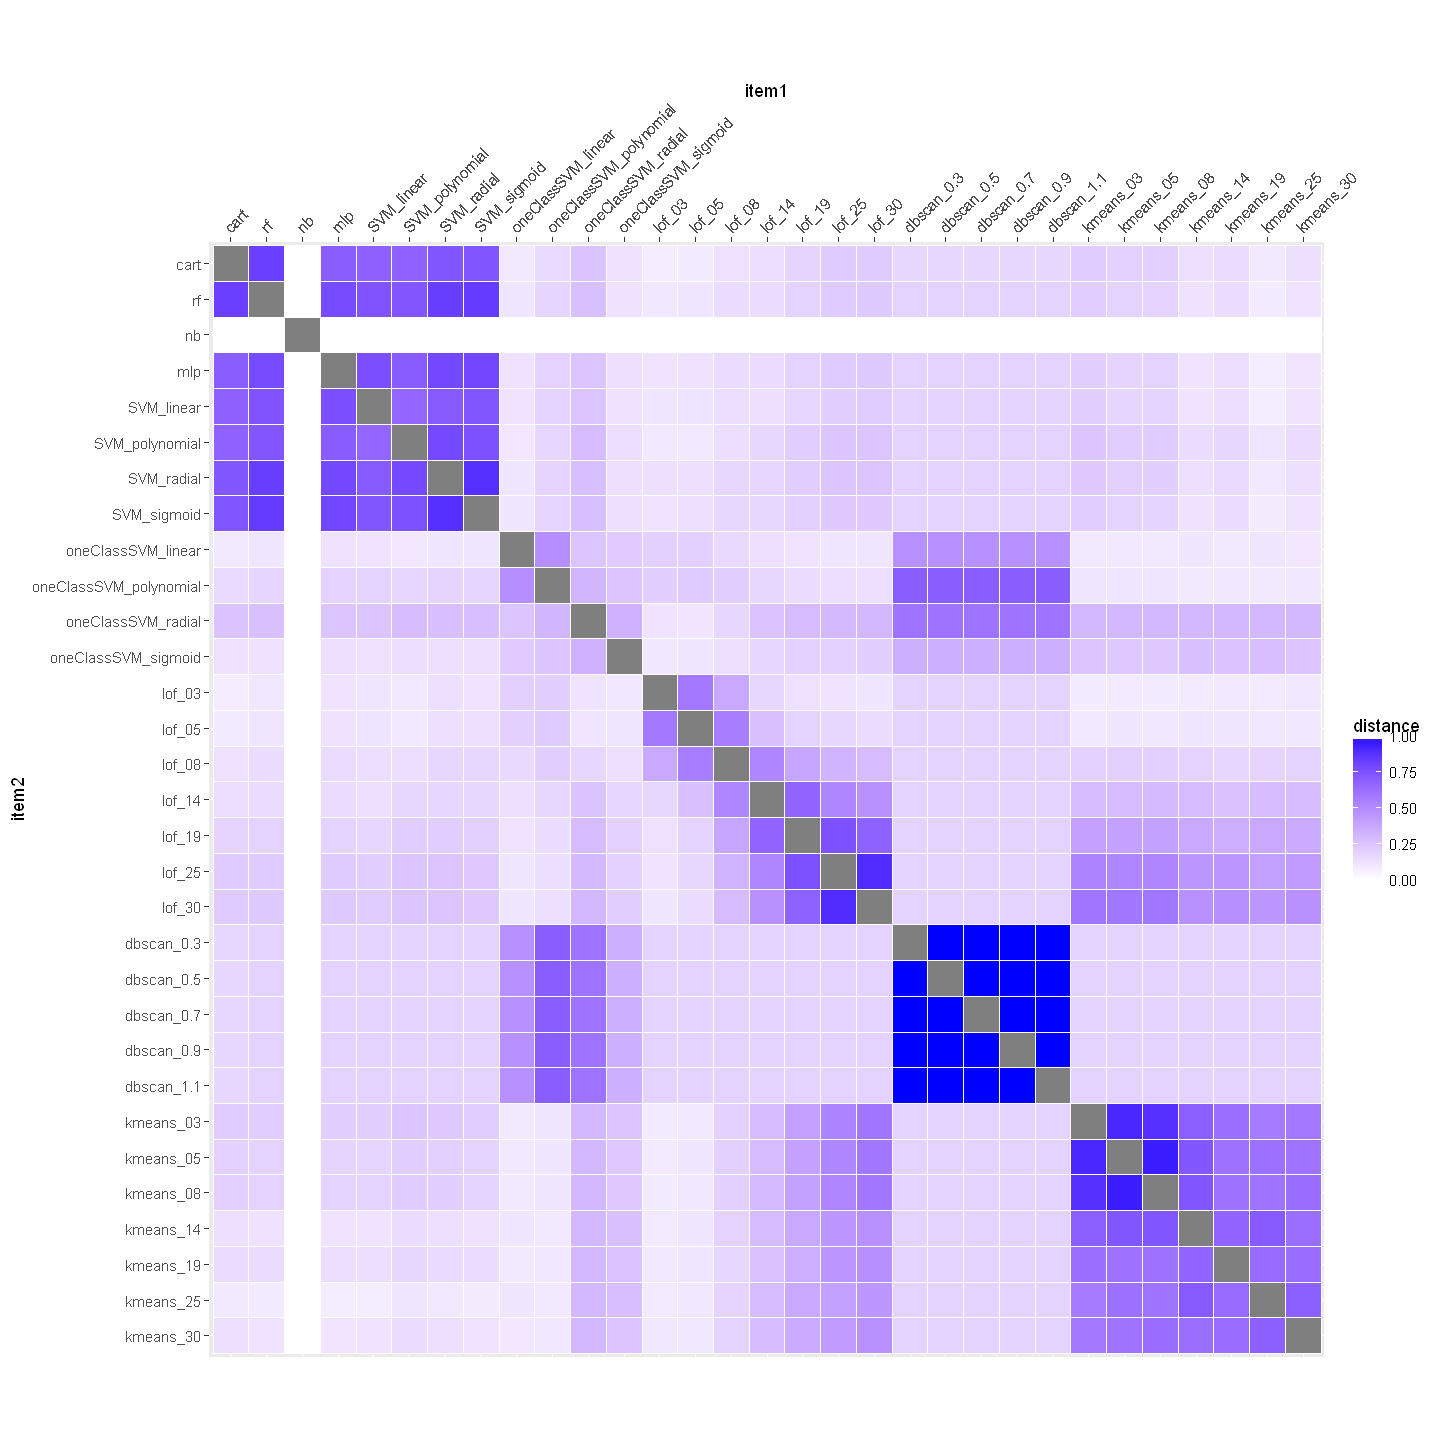

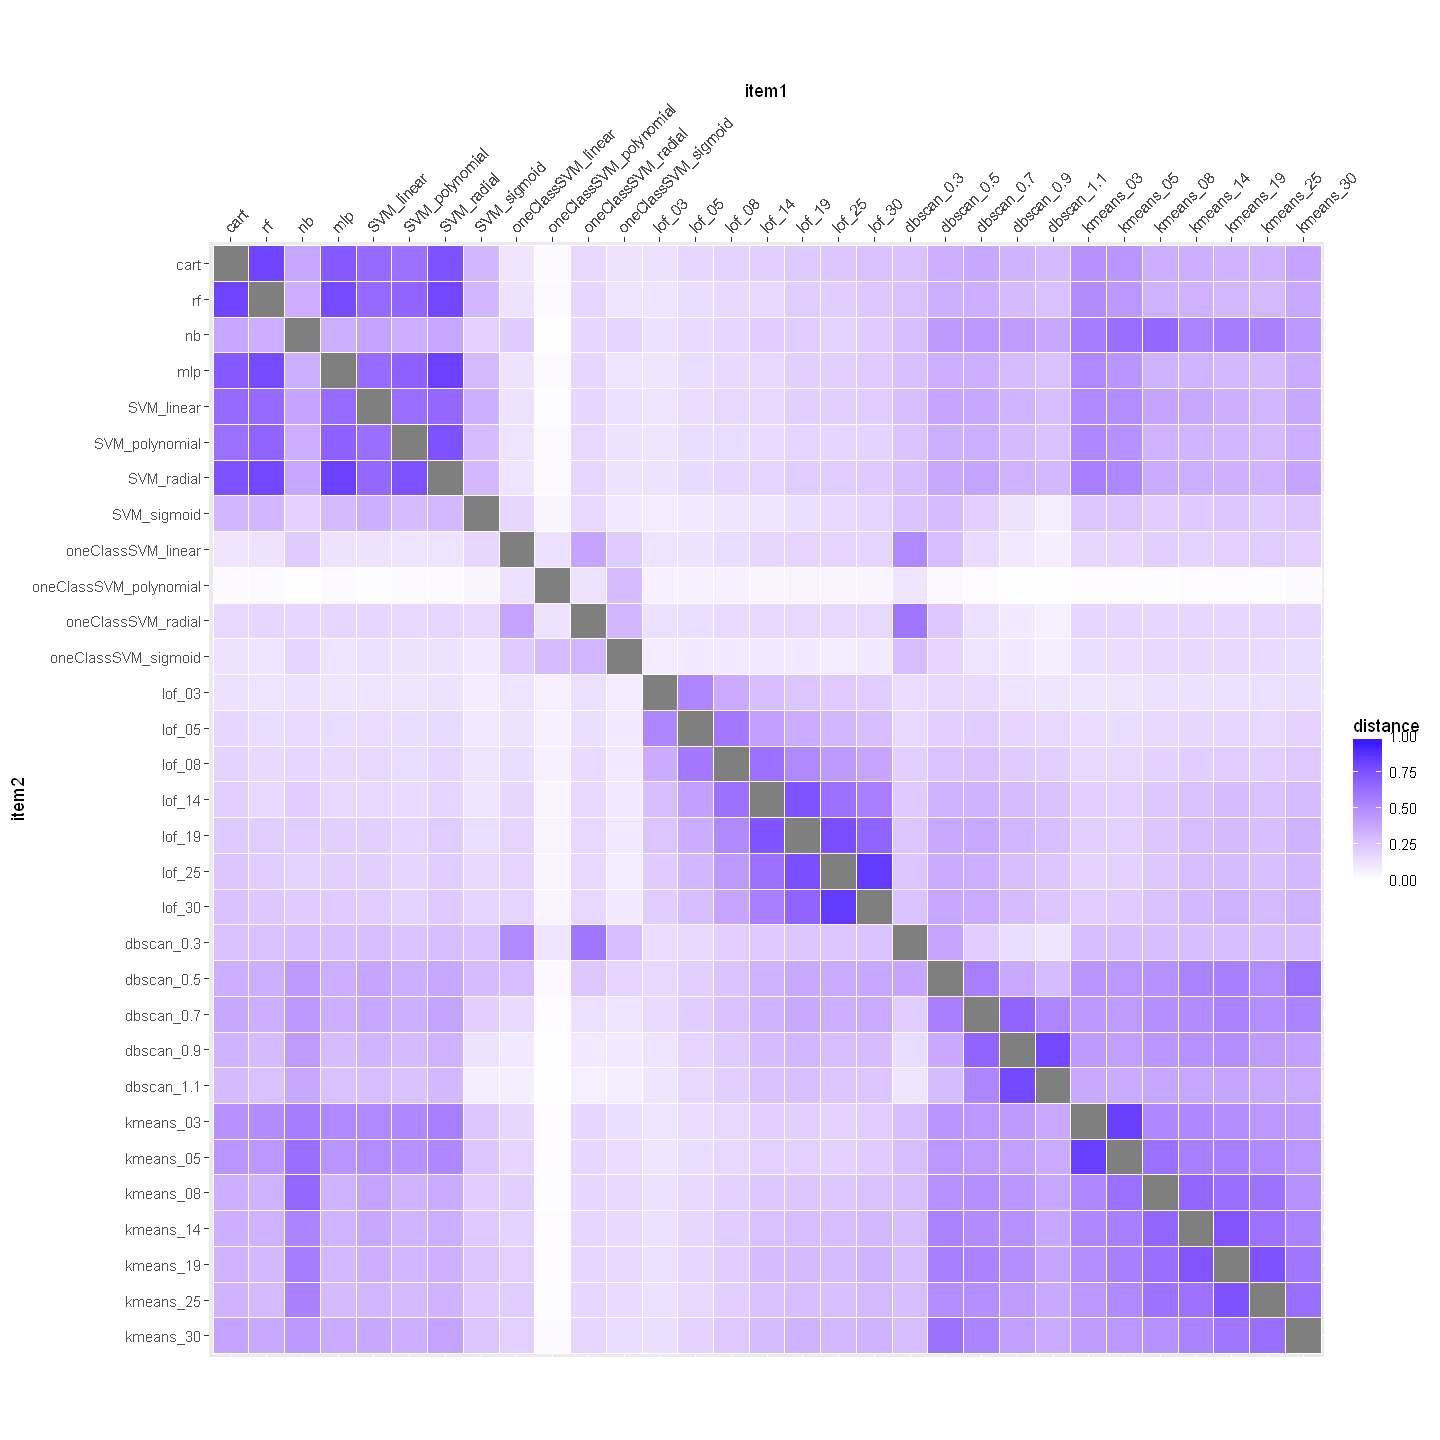

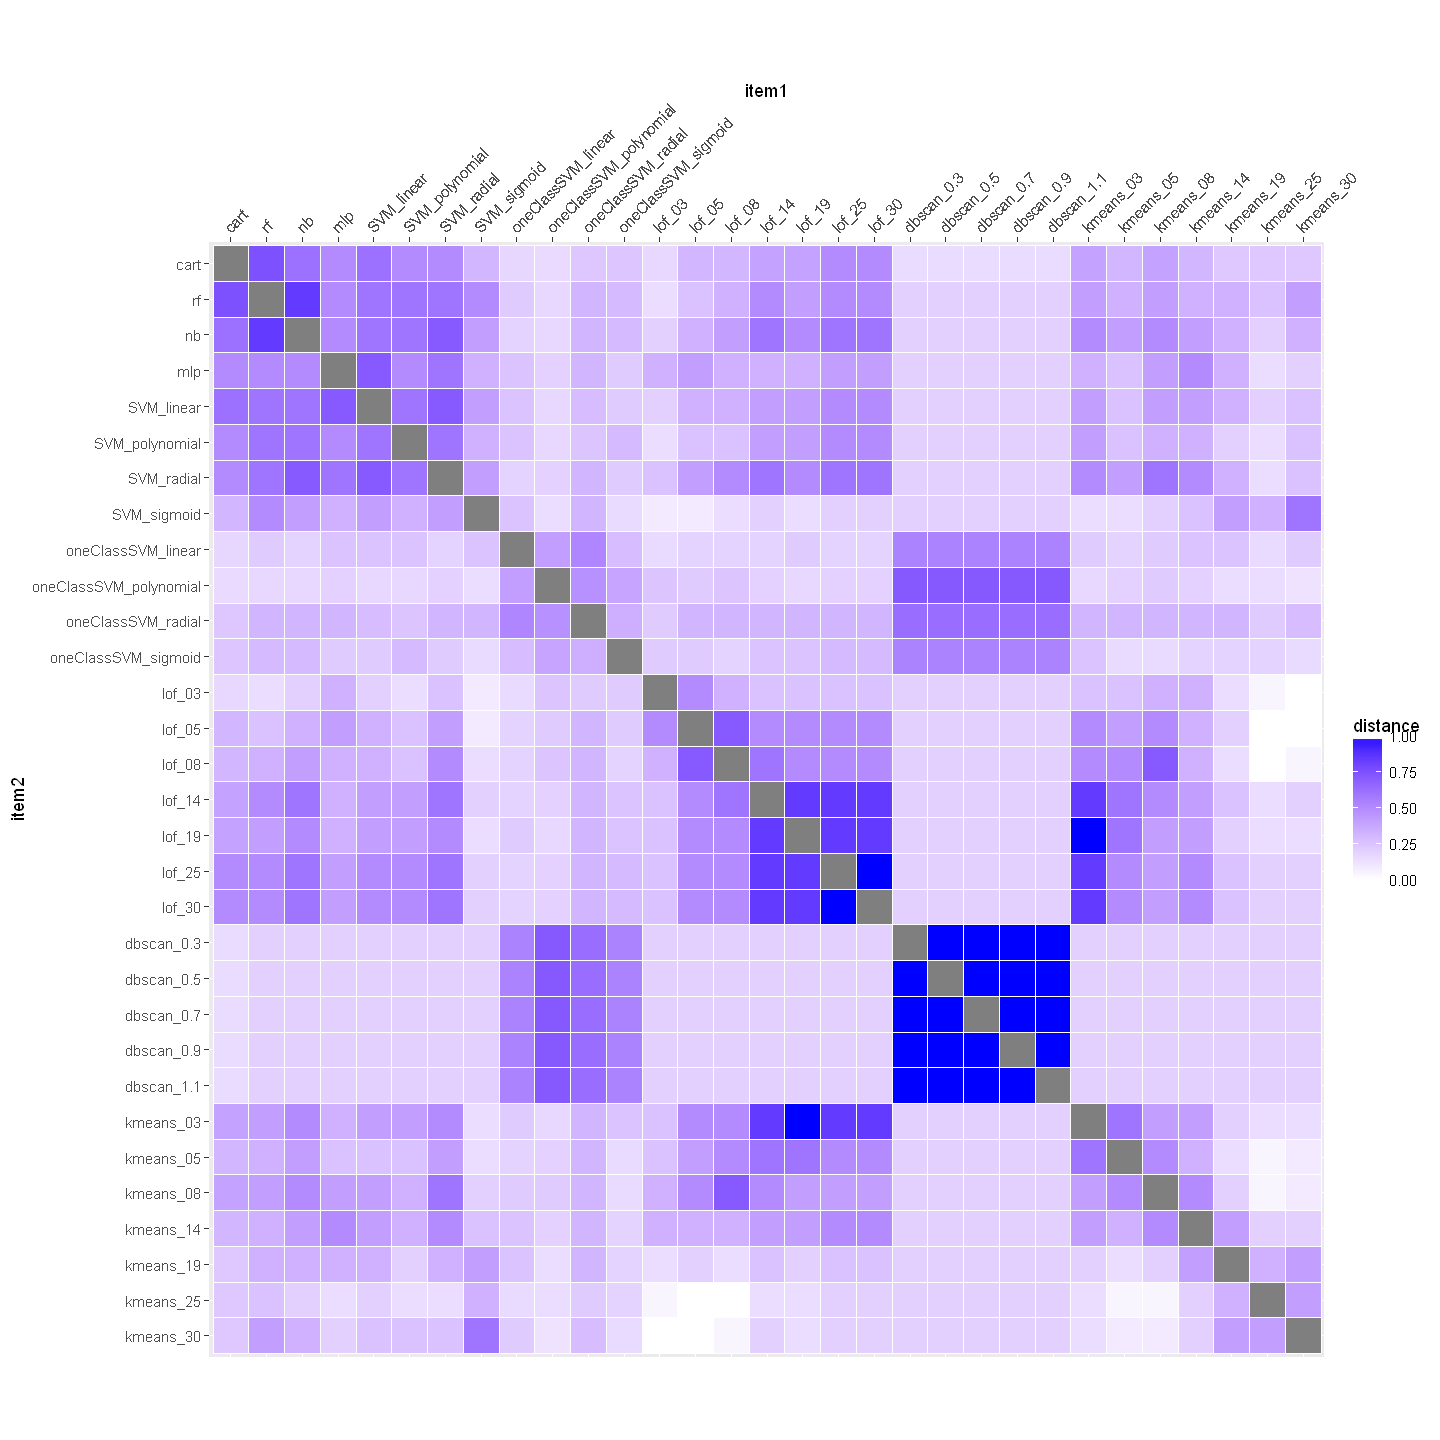

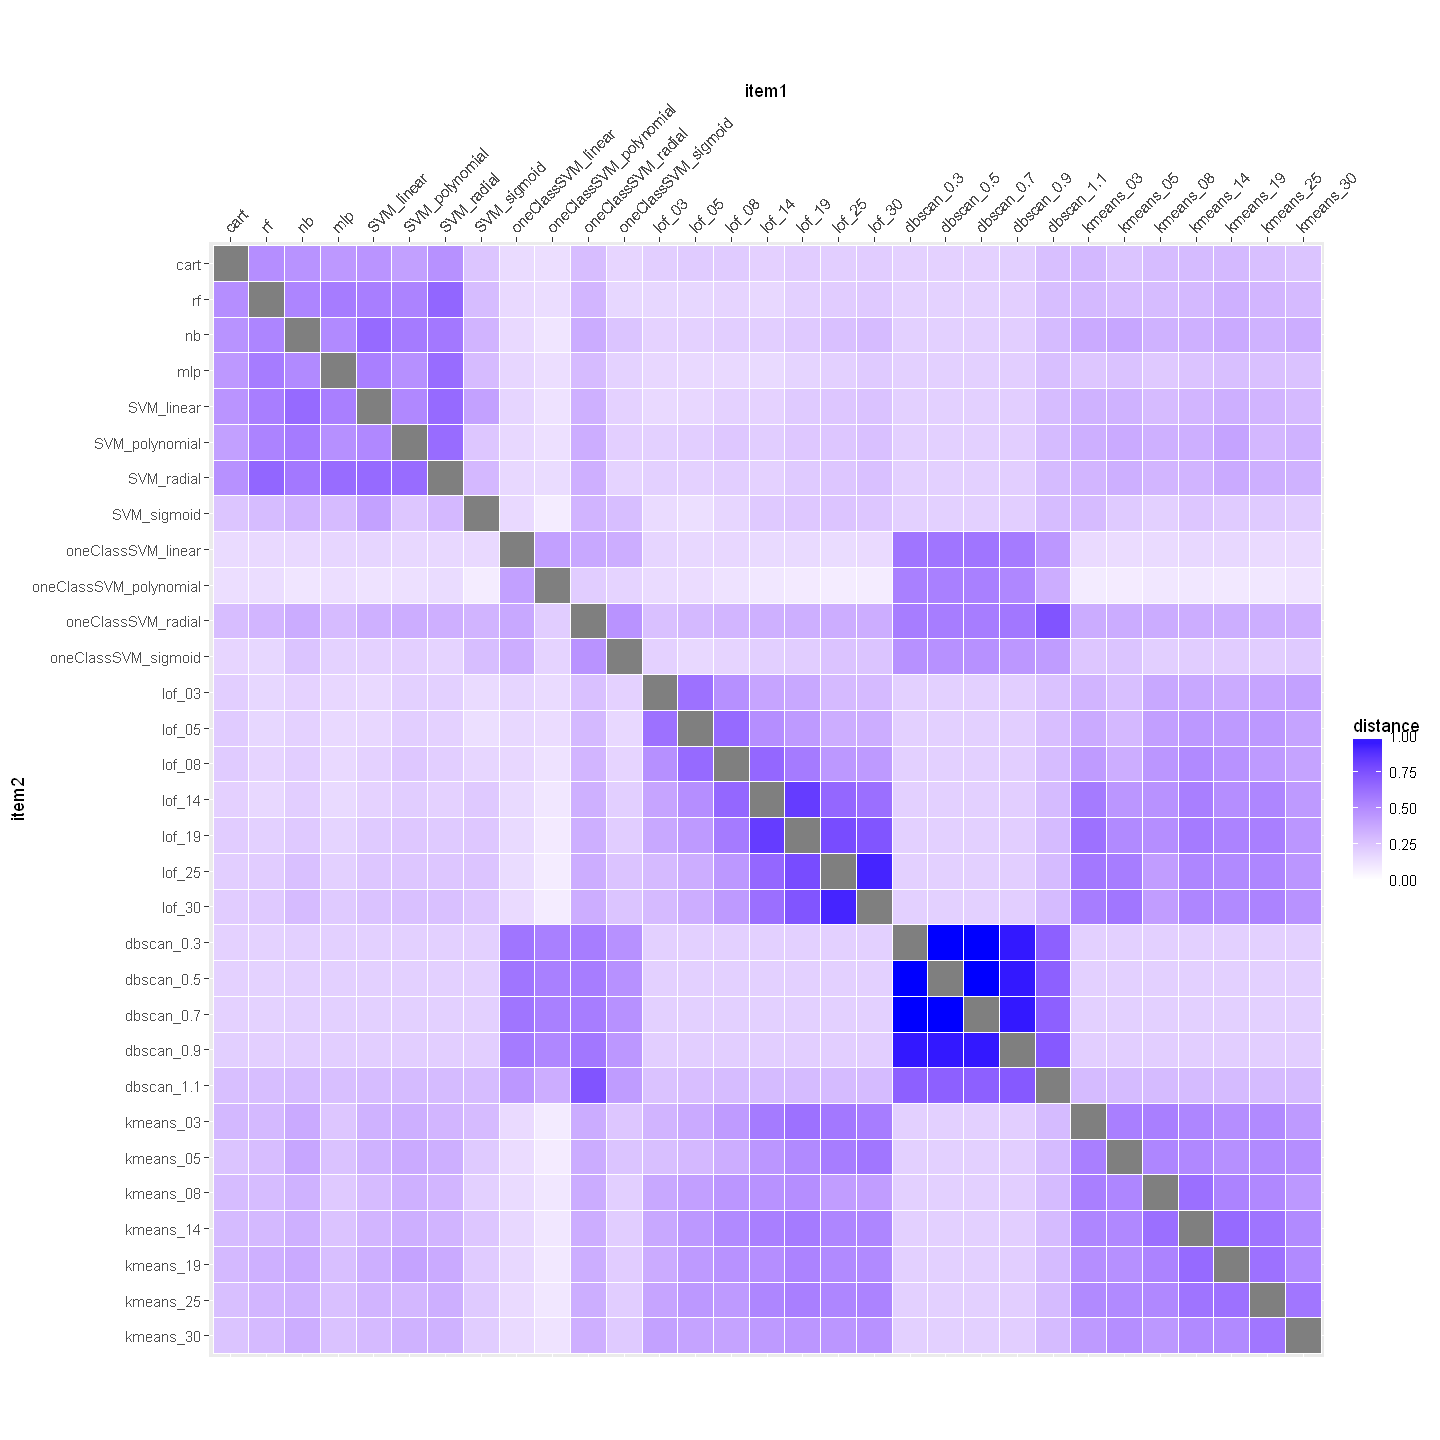

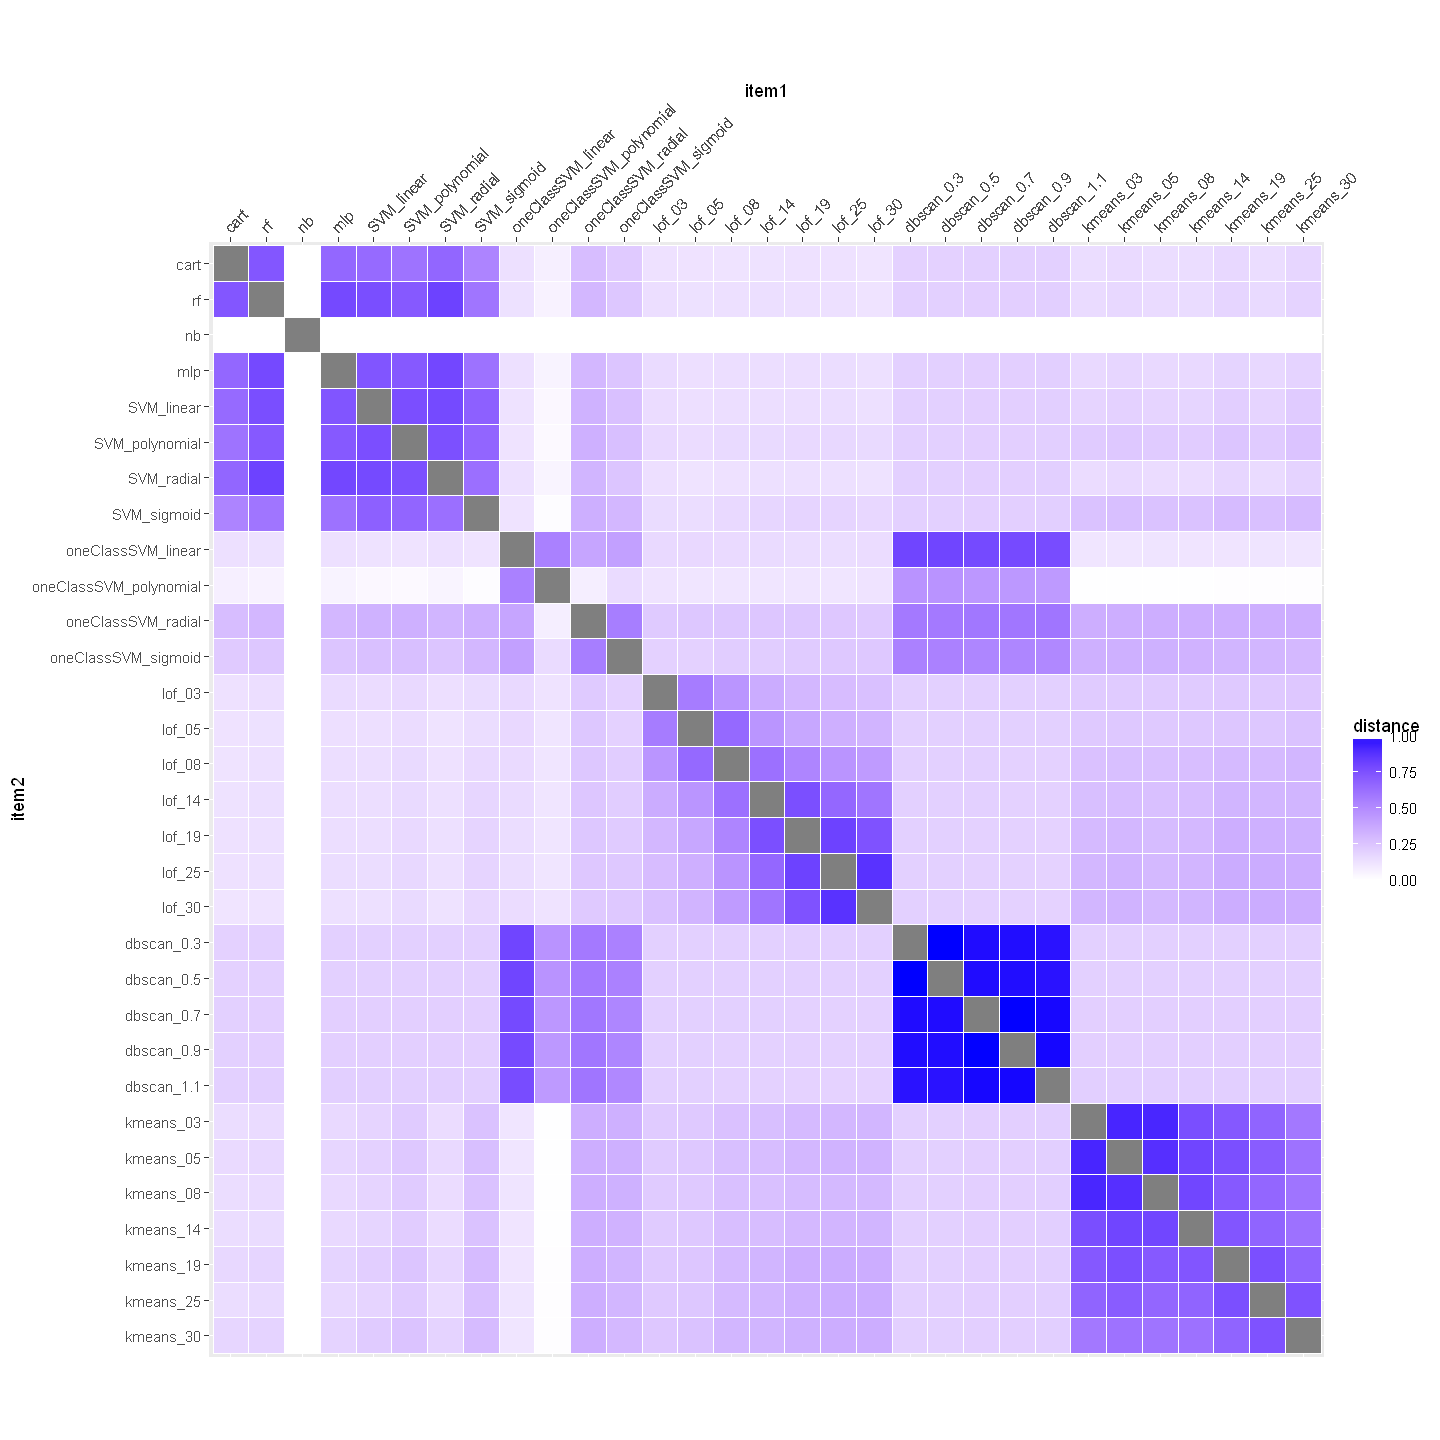

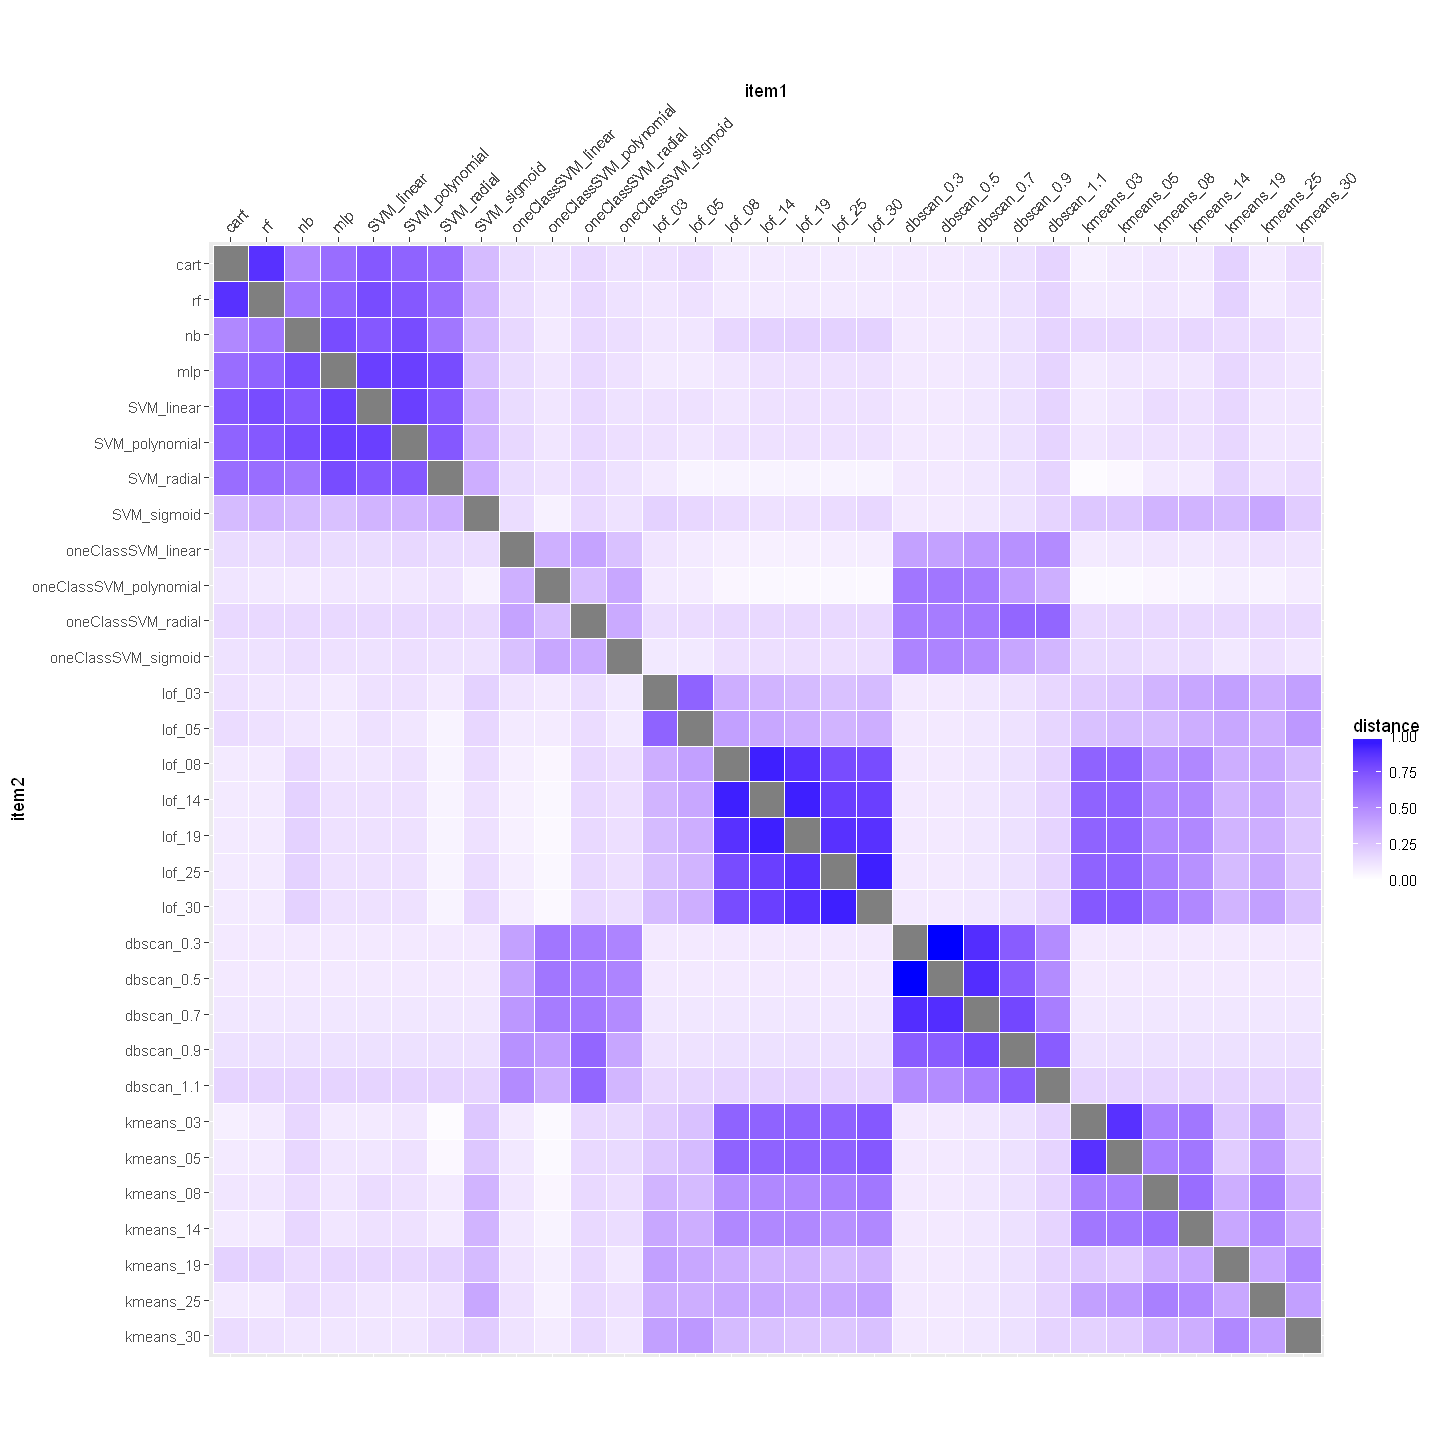

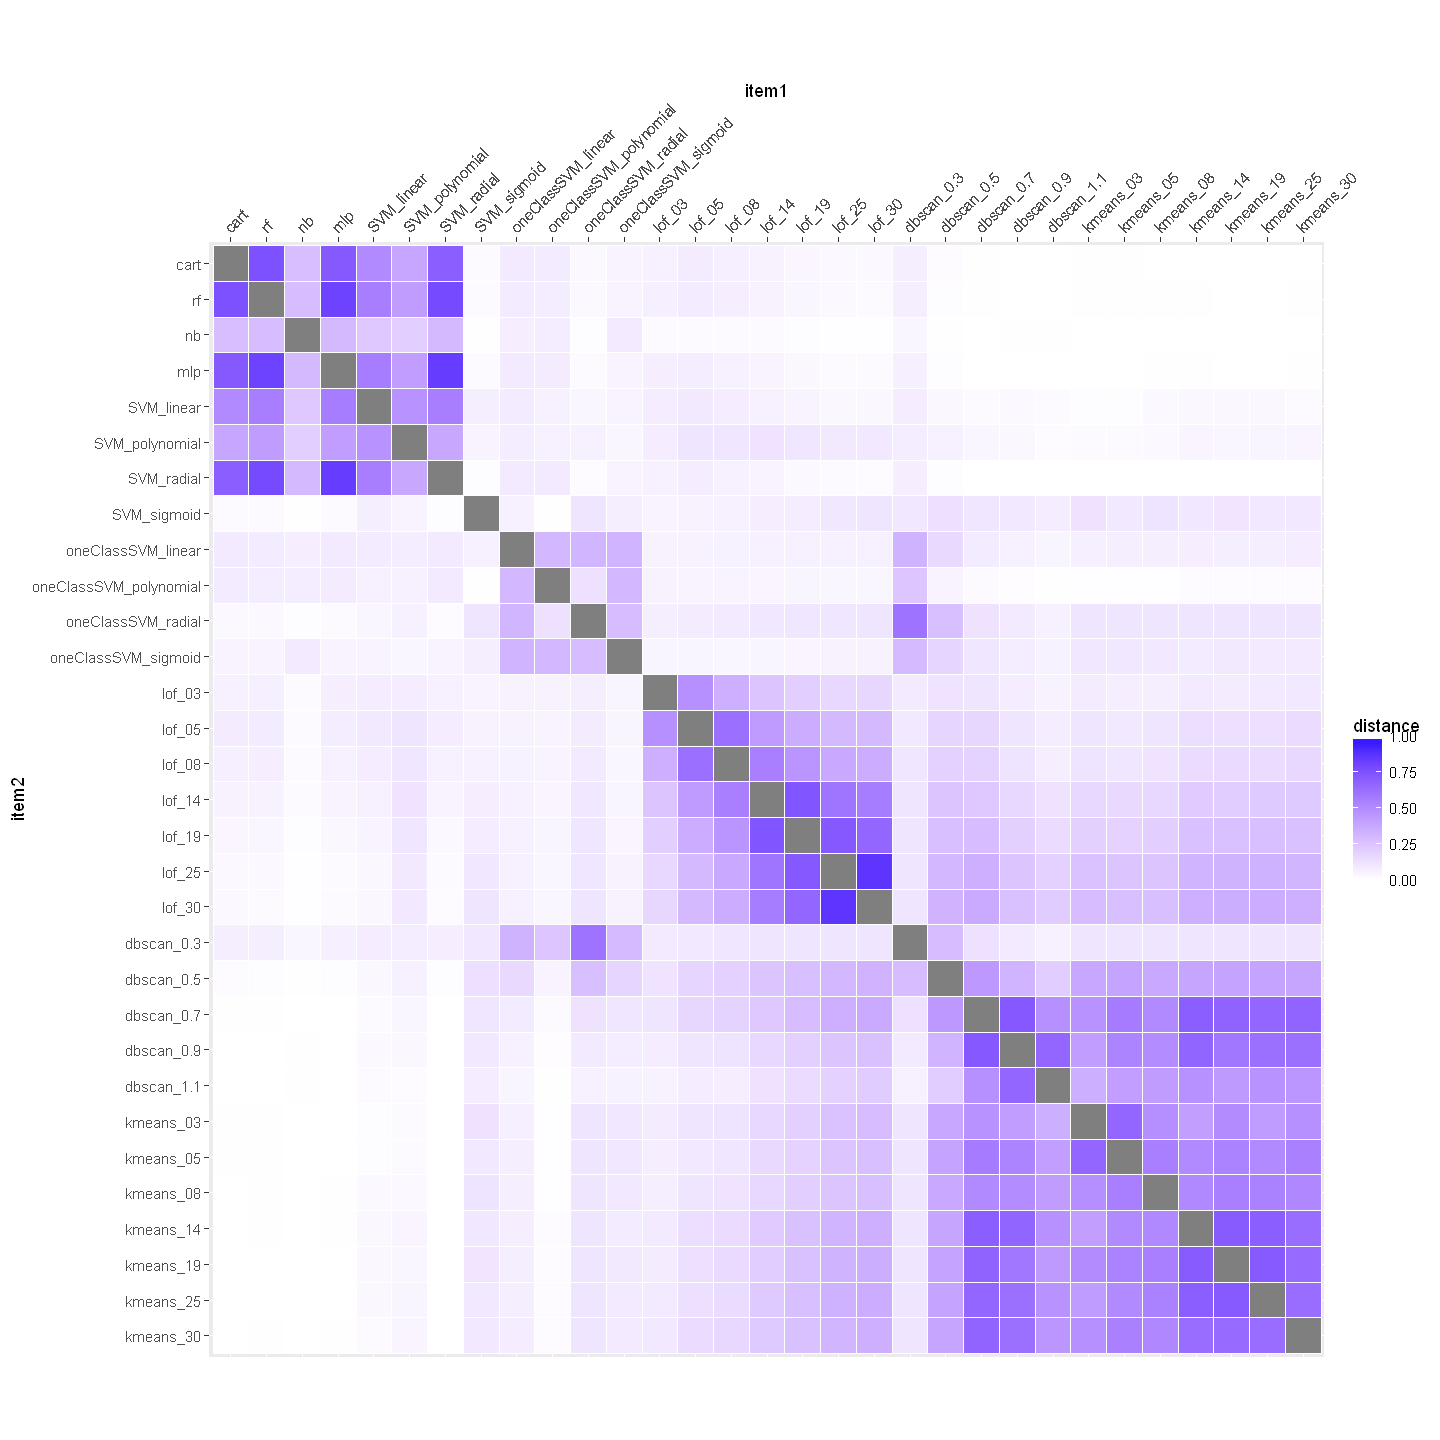

In [24]:
options(repr.plot.width=12, repr.plot.height=12)

for(dname in unique(datasets_df$dataset))
{
  dataset_data <- datasets_df %>% filter(dataset == dname) %>% select(-dataset, -outlier)
  
  for(colname in colnames(dataset_data))
    dataset_data[[colname]] <- ifelse(dataset_data[[colname]] == "yes", 1, 0)
   
  #a <- simil(t(dataset_data %>% select(-)), method = "simple matching", diag = TRUE, upper = TRUE) %>%
  #  as.matrix()
  a <- simil(t(dataset_data), method = "Jaccard", diag = TRUE, upper = TRUE) %>%
    as.matrix() %>% stats::as.dist(diag = TRUE, upper = TRUE) %>% tidy(diag = TRUE, upper = TRUE) %>%
    mutate(distance = ifelse(item1 == item2, NA, distance))
    
  (ggplot(a, aes(item1, item2)) +
    coord_equal() +
    scale_x_discrete(position = "top") +
    scale_y_discrete(limits = rev(levels(a$item2))) +
    geom_tile(aes(fill = distance), colour = "white") +
    scale_fill_gradient(low = "white", high = "blue", limits = c(0, 1)) +
    #scale_x_discrete(limits = rev(levels(a$item1))) +
    #scale_y_discrete(limits = rev(levels(a$item2))) +
    theme(axis.text.x = element_text(angle = 45, hjust = 0))) %>% print
}

In [25]:
options(repr.plot.width=12, repr.plot.height=12)

diversity <- sapply(unique(datasets_df$dataset), simplify = "array", function(dname)
{
  dataset_data <- datasets_df %>% filter(dataset == dname) %>% select(-dataset, -outlier)
  
  for(colname in colnames(dataset_data))
    dataset_data[[colname]] <- ifelse(dataset_data[[colname]] == "yes", 1, 0)
   
  similarity <- simil(t(dataset_data), method = "Jaccard", diag = TRUE, upper = TRUE) %>%
    as.matrix()
})

In [26]:
diversity_mean <- apply(diversity, c(1,2), function(x) mean(x, na.rm = TRUE))

In [27]:
diversity_mean <- diversity_mean %>% stats::as.dist(diag = TRUE, upper = TRUE) %>% tidy(diag = TRUE, upper = TRUE) %>%
  mutate(distance = ifelse(item1 == item2, NA, distance))

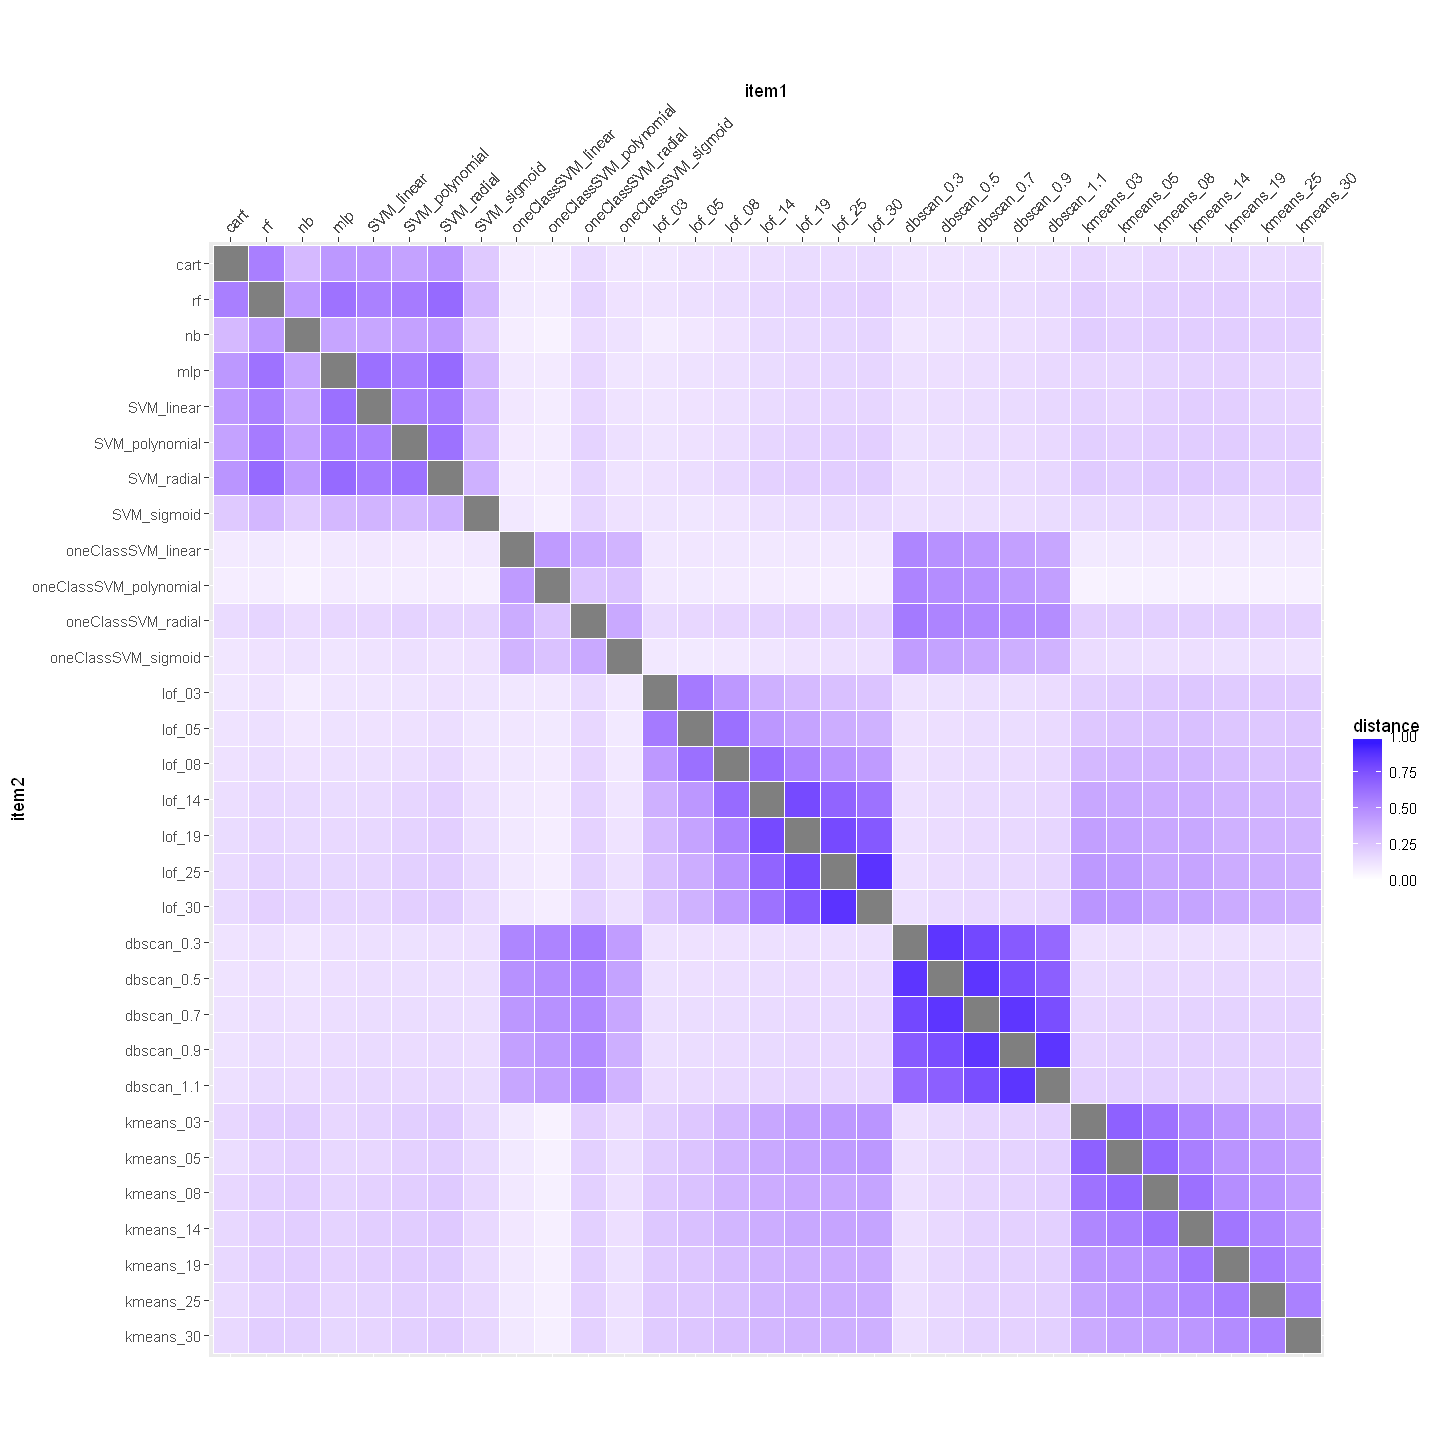

In [28]:
ggplot(diversity_mean, aes(item1, item2)) +
    coord_equal() +
    scale_x_discrete(position = "top") +
    scale_y_discrete(limits = rev(levels(a$item2))) +
    geom_tile(aes(fill = distance), colour = "white") +
    scale_fill_gradient(low = "white", high = "blue", limits = c(0, 1)) +
    #scale_x_discrete(limits = rev(levels(a$item1))) +
    #scale_y_discrete(limits = rev(levels(a$item2))) +
    theme(axis.text.x = element_text(angle = 45, hjust = 0))

In [29]:
diversity_sd <- apply(diversity, c(1,2), function(x) sd(x, na.rm = TRUE))
diversity_sd

,cart,rf,nb,mlp,SVM_linear,SVM_polynomial,SVM_radial,SVM_sigmoid,oneClassSVM_linear,oneClassSVM_polynomial,oneClassSVM_radial,oneClassSVM_sigmoid,lof_03,lof_05,lof_08,lof_14,lof_19,lof_25,lof_30,dbscan_0.3,dbscan_0.5,dbscan_0.7,dbscan_0.9,dbscan_1.1,kmeans_03,kmeans_05,kmeans_08,kmeans_14,kmeans_19,kmeans_25,kmeans_30
cart,NA,0.27058656,0.23208664,0.24753656,0.23168891,0.22148098,0.25034506,0.21390924,0.07434534,0.06664160,0.13345581,0.08217929,0.12529717,0.14794528,0.14759048,0.16205575,0.17119905,0.16438664,0.16315544,0.10060248,0.10993983,0.11273850,0.10641287,0.11197277,0.15240639,0.15214451,0.16327270,0.15560780,0.15340064,0.14910939,0.15732975
rf,0.27058656,NA,0.29152750,0.21071474,0.22317259,0.17822302,0.18118476,0.25249277,0.07508741,0.06372403,0.14272987,0.08996875,0.13475088,0.13709209,0.13752604,0.15538031,0.15428768,0.15458135,0.15092017,0.09931493,0.10519870,0.10582353,0.10110637,0.11165949,0.15664858,0.15071069,0.15886296,0.15771134,0.15935659,0.15261419,0.17563246
nb,0.23208664,0.29152750,NA,0.26529913,0.25164337,0.26917587,0.27221809,0.23504425,0.08354365,0.06596127,0.15341908,0.11008159,0.13206698,0.14088939,0.14720072,0.17571557,0.17241941,0.17916593,0.17847472,0.10859404,0.12450820,0.12588542,0.12594590,0.13218516,0.20176586,0.20041558,0.21103951,0.19394078,0.19832675,0.18911356,0.18939613
mlp,0.24753656,0.21071474,0.26529913,NA,0.20820300,0.19185861,0.17868706,0.22603159,0.08008573,0.07184816,0.13300769,0.07945453,0.12300261,0.13153114,0.12254318,0.13650096,0.14776513,0.14289790,0.13747166,0.09934840,0.10568294,0.10507543,0.10036536,0.11036563,0.13318397,0.13200289,0.13258088,0.14425395,0.14436969,0.13038563,0.15675129
SVM_linear,0.23168891,0.22317259,0.25164337,0.20820300,NA,0.20926116,0.20723151,0.24440067,0.08495888,0.07381458,0.12586085,0.08199253,0.09482849,0.10347023,0.10183114,0.12419899,0.13701422,0.13352246,0.13198166,0.09935147,0.10784350,0.10611238,0.09918502,0.10799096,0.13307896,0.12119677,0.13385603,0.13473517,0.12986371,0.12024298,0.14568060
SVM_polynomial,0.22148098,0.17822302,0.26917587,0.19185861,0.20926116,NA,0.18984162,0.24066390,0.08069956,0.06498133,0.14143112,0.10242247,0.11274048,0.11715958,0.11888376,0.13224684,0.13996397,0.14026194,0.13584798,0.09882299,0.10410207,0.10431531,0.09980362,0.11125618,0.13821957,0.12928836,0.11688603,0.12822917,0.13869400,0.13424755,0.15378695
SVM_radial,0.25034506,0.18118476,0.27221809,0.17868706,0.20723151,0.18984162,NA,0.25964098,0.07095388,0.07048438,0.14314561,0.08483745,0.13318231,0.14817608,0.15961418,0.19469490,0.20589157,0.19674954,0.19368258,0.09957185,0.10773057,0.10917868,0.10234036,0.11176328,0.17470513,0.17386727,0.17633610,0.16939824,0.15651820,0.15110757,0.20521613
SVM_sigmoid,0.21390924,0.25249277,0.23504425,0.22603159,0.24440067,0.24066390,0.25964098,NA,0.08089155,0.06442596,0.13075253,0.09940273,0.10086428,0.09403620,0.09500913,0.08783947,0.08933660,0.09991203,0.09486955,0.09726547,0.09656233,0.08849484,0.08372808,0.09609313,0.09992011,0.10077714,0.10245365,0.10675541,0.12278028,0.12374928,0.14264288
oneClassSVM_linear,0.07434534,0.07508741,0.08354365,0.08008573,0.08495888,0.08069956,0.07095388,0.08089155,NA,0.10819936,0.06557321,0.06044651,0.07726372,0.07979716,0.07773560,0.07451342,0.07450768,0.07312818,0.07348736,0.13494008,0.18138557,0.20971468,0.21750129,0.22858149,0.07711809,0.07561300,0.07931467,0.08316740,0.08225348,0.07452738,0.07938724
oneClassSVM_polynomial,0.06664160,0.06372403,0.06596127,0.07184816,0.07381458,0.06498133,0.07048438,0.06442596,0.10819936,NA,0.15573827,0.08855817,0.07527830,0.07613398,0.07714134,0.06947225,0.06470660,0.06486395,0.06433287,0.23754600,0.28560811,0.30508497,0.31171113,0.31933611,0.06097344,0.06671788,0.06963760,0.06647469,0.06607164,0.06315710,0.06538731


In [30]:
diversity_sd <- diversity_sd %>% stats::as.dist(diag = TRUE, upper = TRUE) %>% tidy(diag = TRUE, upper = TRUE) %>%
  mutate(distance = ifelse(item1 == item2, NA, distance))

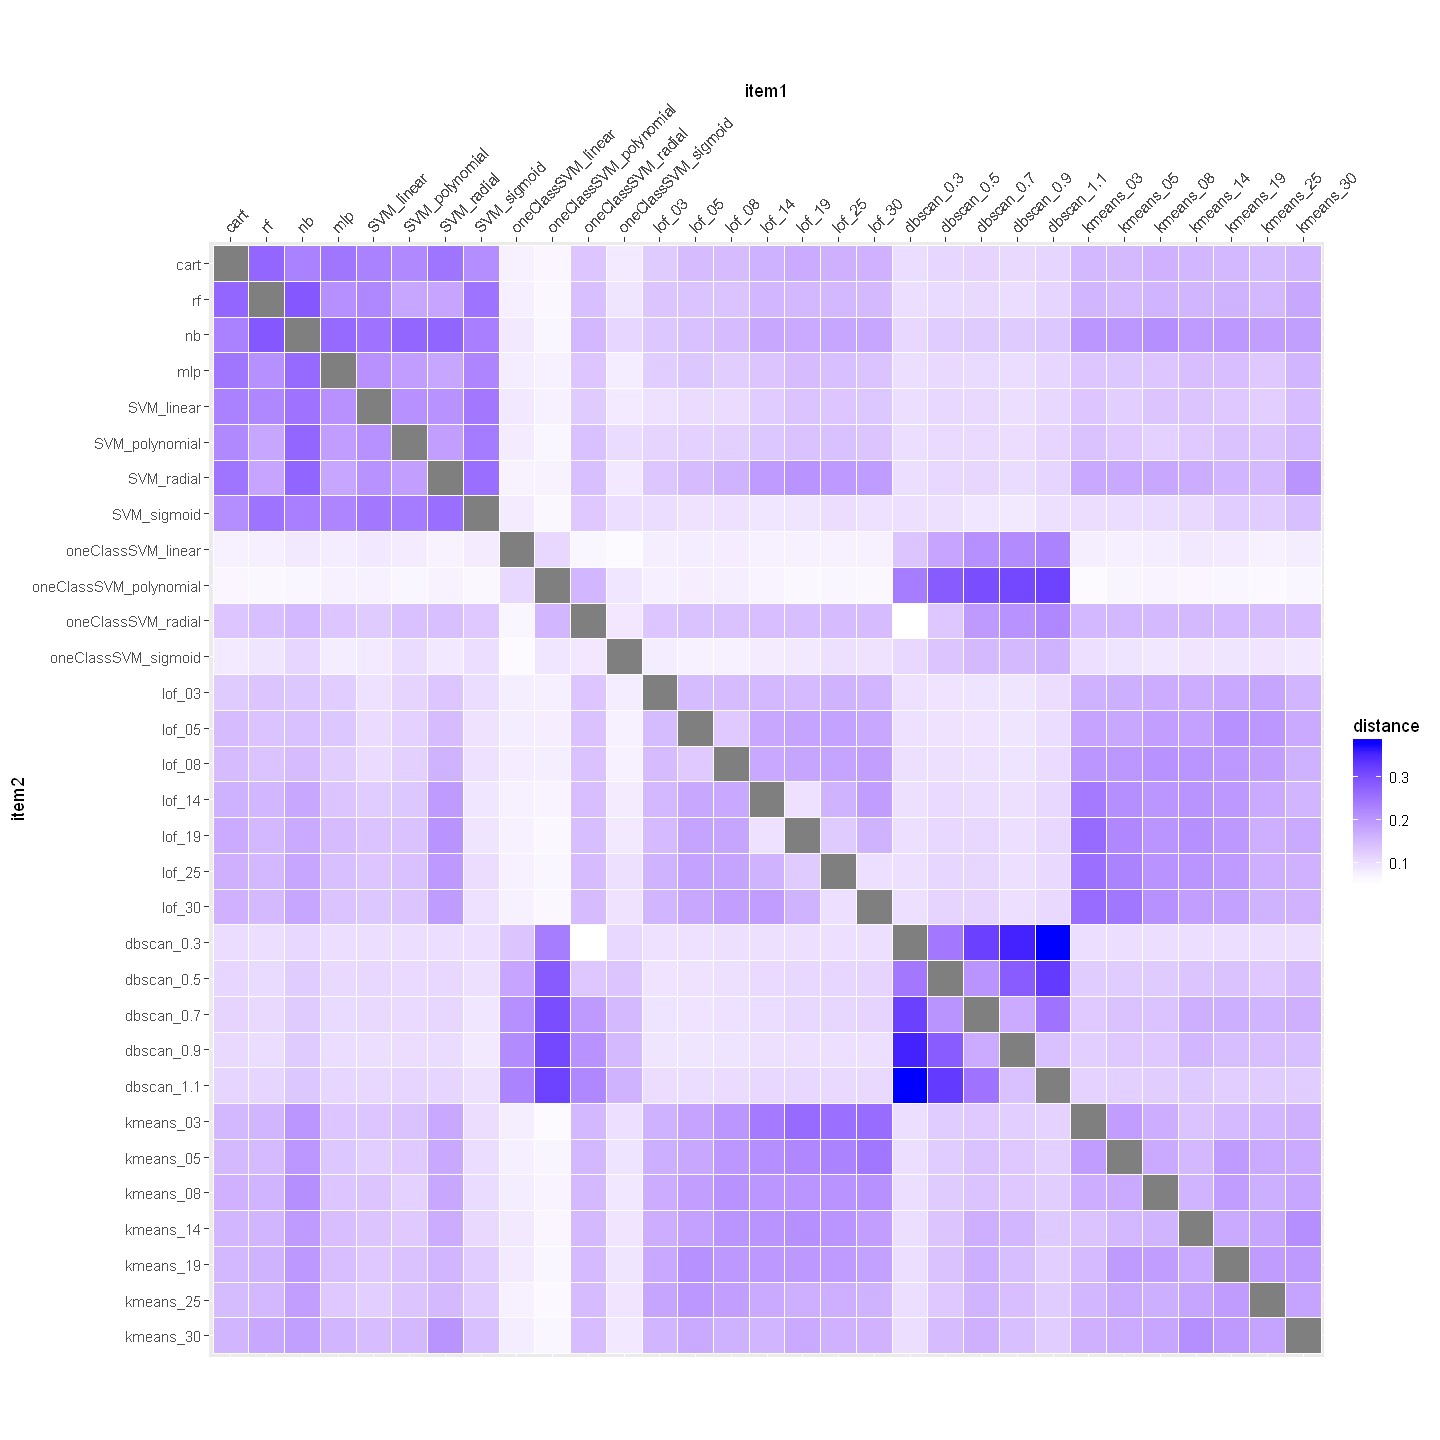

In [31]:
ggplot(diversity_sd, aes(item1, item2)) +
    coord_equal() +
    scale_x_discrete(position = "top") +
    scale_y_discrete(limits = rev(levels(a$item2))) +
    geom_tile(aes(fill = distance), colour = "white") +
    scale_fill_gradient(low = "white", high = "blue") +
    #scale_x_discrete(limits = rev(levels(a$item1))) +
    #scale_y_discrete(limits = rev(levels(a$item2))) +
    theme(axis.text.x = element_text(angle = 45, hjust = 0))

# 2) Stacking Performance Study

In [32]:
evaluation_algorithms

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall,algorithm_f20,algorithm_f05
dataset_aloi,CART,cart,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
dataset_aloi,DBSCAN,dbscan_0.3,0.071833415,0.037666365,0.77320955,0.157618687,0.046516452
dataset_aloi,DBSCAN,dbscan_0.5,0.077603926,0.041422238,0.61339523,0.163064556,0.050918179
dataset_aloi,DBSCAN,dbscan_0.7,0.080079858,0.043694021,0.47877984,0.160046107,0.053399207
dataset_aloi,DBSCAN,dbscan_0.9,0.081662628,0.045916261,0.36870027,0.153244033,0.055662342
dataset_aloi,DBSCAN,dbscan_1.1,0.080424462,0.046778560,0.28647215,0.141481627,0.056179775
dataset_aloi,kmeans,kmeans_03,0.045755968,0.045755968,0.04575597,0.045755968,0.045755968
dataset_aloi,kmeans,kmeans_05,0.043103448,0.043103448,0.04310345,0.043103448,0.043103448
dataset_aloi,kmeans,kmeans_08,0.051061008,0.051061008,0.05106101,0.051061008,0.051061008
dataset_aloi,kmeans,kmeans_14,0.051724138,0.051724138,0.05172414,0.051724138,0.051724138


In [ ]:
ensemble_all <- read.csv("results_evaluation/algorithms_metrics_2017-08-16.csv")